<a href="https://colab.research.google.com/github/iRoseM/Freelancing-Trends--IT362/blob/main/IT362_groub_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Freelancing Trends and Sustainability**

## **1. Introduction:**
Freelancing has become a popular career path due to its flexibility and the opportunities it provides across various fields. However, several questions arise regarding its sustainability, income stability, and the demographics of those engaging in this type of work. Understanding freelancing trends can help clarify whether freelancing is a sustainable career choice, identify income patterns, and determine the demographics of freelancers, such as  examining whether freelancing is a sustainable career path, identifying countries with the highest concentration of skilled freelancers and more.


## **1.	Data Sources:**


**Primary dataset** is sourced through using web scraping method on [freelancer.com](https://www.freelancer.com) website. Web scraping is a technique for extracting unstructured data from websites, enabling efficient large-scale data collection.

The main tool used for scraping is BeautifulSoup.

### - Printing HTML structure to easily navigate the code

In [49]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import random
from IPython.core.display import display, HTML
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



# Collect and parse first page
response = requests.get('https://www.freelancer.com/freelancers/1')
print(response.status_code)

soup = BeautifulSoup(response.text, 'html.parser')
print (soup.prettify())



200
<!DOCTYPE html>
<html class="is-responsive is-mobile-first" lang="en">
 <head>
  <!-- Critical path meta tags only -->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="en" http-equiv="Content-Language"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <title>
    Freelancers For Hire | Freelancer
   </title>
   <link crossorigin="" href="//www.f-cdn.com" rel="preconnect"/>
   <link href="//cdn2.f-cdn.com" rel="dns-prefetch"/>
   <link href="//cdn3.f-cdn.com" rel="dns-prefetch"/>
   <link href="//cdn4.f-cdn.com" rel="dns-prefetch"/>
   <link href="//cdn5.f-cdn.com" rel="dns-prefetch"/>
   <link href="//cdn6.f-cdn.com" rel="dns-prefetch"/>
   <!-- Google Experiment. ga_exp.js is special, don't include any script in the head! -->
   <!-- Font face handling for an FOFT rendering approach -->
   <style>
    @font-face {
          font-family: 'RobotoSubset';
    

#### - Data retrieval
We extracted data by scraping the website's HTML elements, targeting specific tags to retrieve the relevant information.

In [50]:
num_pages = 100
base_url = "https://www.freelancer.com/freelancers/"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

data = []

random_page_numbers = random.sample(range(1, 700), num_pages)

for page in random_page_numbers:
    url = f"{base_url}{page}"
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        freelancers = soup.find_all('div', class_='directory-freelancer-item-container')

        for freelancer in freelancers:
            name = freelancer.find('a', class_='find-freelancer-username')
            name = name.text.strip() if name else 'N/A'

            hourly_rate = freelancer.find('span', class_='user-hourly-rate freelancer-hourlyrate')
            hourly_rate = hourly_rate.text.strip() if hourly_rate else 'N/A'

            skills = [skill.text.strip() for skill in freelancer.find_all('a', style='color:black;')]
            skills = ', '.join(skills) if skills else 'N/A'

            location = freelancer.find('div', class_='user-location')
            location = location.text.strip() if location else 'N/A'

            bio = freelancer.find('div', class_='bio cleanProfile')
            bio = bio.text.strip() if bio else 'N/A'

            rating_tag = freelancer.find('span', class_='Rating Rating--labeled')
            rating = rating_tag.get('data-star_rating', 'N/A') if rating_tag else 'N/A'

            earnings = freelancer.find('div', class_='Earnings')
            earnings = earnings.text.strip() if earnings else 'N/A'

            reviews_tag = freelancer.find('a', class_='directory-freelancer-rating-mobile')
            if reviews_tag:
                reviews_text = reviews_tag.text.strip()
                reviews = reviews_text.split(' ')[0] if 'reviews' in reviews_text else 'N/A'
            else:
                reviews = 'N/A'

            data.append({
                'Freelancer Name': name,
                'Hourly Rate': hourly_rate,
                'Skills': skills,
                'Location': location,
                'Rating': rating,
                'Reviews': reviews,
                'Total Earnings': earnings,
                'Bio': bio
            })
    else:
        print(f"Failed to retrieve page {page}, status code: {response.status_code}")

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/iRoseM/Freelancing-Trends--IT362/main/Dataset/Raw_Dataset.csv")

print(df.head(10))

    Freelancer Name       Hourly Rate  \
0          artdjuna  $30 USD per hour   
1        kkwebart09  $15 USD per hour   
2          enervell  $50 USD per hour   
3     sharminnaharm  $10 USD per hour   
4          ancineha  $15 USD per hour   
5         Kubragull  $50 USD per hour   
6  mdsadikulislamss  $10 USD per hour   
7  trivediheenalove  $20 USD per hour   
8    RMMcontractors  $50 USD per hour   
9        QualityHub  $20 USD per hour   

                                              Skills    Location  Rating  \
0  Logo Design, Photoshop, Illustration, Corporat...   Indonesia     4.9   
1  Graphic Design, Photoshop Design, Logo Design,...       India     4.9   
2    Node.js, AngularJS, PostgreSQL, JavaScript, PHP    Colombia     5.0   
3  Logo Design, Graphic Design, Photoshop, Illust...  Bangladesh     4.9   
4  Graphic Design, Website Design, User Interface...       India     5.0   
5  3D Rendering, Interior Design, 3D Modelling, B...      Turkey     4.5   
6  Graphic Desig

### **2. Dataset Overview:**
This section summarizes the dataset, and introduce some basic information about our dataset, such as its size, head, and null values, data types.

#### - Dataset size
Our dataset have 1000 rows and 8 columns, where each row in the dataset represents a freelancer experience, with columns detailing their relevant characteristics.

In [51]:
# number of rows and columns
df.shape

(1000, 8)

#### - Dataset general information



In [52]:
# print main dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Freelancer Name  1000 non-null   object 
 1   Hourly Rate      1000 non-null   object 
 2   Skills           996 non-null    object 
 3   Location         1000 non-null   object 
 4   Rating           1000 non-null   float64
 5   Reviews          939 non-null    float64
 6   Total Earnings   1000 non-null   float64
 7   Bio              1000 non-null   object 
dtypes: float64(3), object(5)
memory usage: 62.6+ KB
None


| Column Name      | Description                                   | Data Type | Possible Values                                  |
|------------------|-----------------------------------------------|-----------|--------------------------------------------------|
| Freelancer Name  | The name of the freelancer, used to personalize their profile on the platform.                        | Object    | String values representing freelancer names      |
| Hourly Rate      | The amount a freelancer charges per hour of work.             | Object    | String (e.g., "$25", "N/A")                      |
| Skills           |  A list of specific abilities, expertise, or proficiencies that a freelancer possesses (e.g., graphic designer, video editor.. etc). | Object    | Comma-separated string of skills or "N/A"        |
| Location         | The freelancer's country of residence or work (e.g., Lebanon, UK.. etc).                    | Object    | String (e.g., "New York", "N/A")                 |
| Rating          | The average rating given to the freelancer based on client reviews and feedback.             | Object    |String (e.g., "4.5", "N/A")                |
| Reviews          | The number of feedback received from clients reflecting a freelancer's performance and quality of work.             | Object    | String (e.g., "5 reviews", "N/A")                |
| Total Earnings              | The Earnings Score represents a freelancer’s overall earnings from the projects and contests they have successfully completed on the site.               | Object    | String (e.g., "7.8", "N/A") |
| Bio              | A brief description written by the freelancer outlining his/her background, experience, and professional journey.               | Object    | String (e.g., "Experienced software developer", "N/A") |

 **As shown in code**, all columns are of the "object" data type, which means that the column contains mixed data types. This includes freelancer names, hourly rates, skills, locations, reviews, and bios.

#### - Number of missing values
As shown below, the number of null values is 0 for all attributes, except for 'Skills' (4 missing values) and 'Reviews' (61 missing values). This means that we have missing data in these two columns. Therefore, we may need to handle these missing values by filling them with appropriate values or deciding whether to drop them, depending on the analysis requirements.

In [53]:
# Number of missing value in the dataset
df.replace(["N/A"], pd.NA, inplace=True)
df.isnull().sum()

,0
Freelancer Name,0
Hourly Rate,0
Skills,4
Location,0
Rating,0
Reviews,61
Total Earnings,0
Bio,0


#### - Number of duplicates

In [54]:
# Number of duplicated rows
print("Total number of duplicated rows: " + str(sum(df.duplicated(subset=['Freelancer Name'], keep=False))))


Total number of duplicated rows: 104


In [55]:
df[df['Freelancer Name'].duplicated(keep=False)]


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio
14,takacstamas,$15 USD per hour,"3D Design, 3D Logo, Graphic Design, Logo Design",Hungary,0.0,0.0,0.0,"I am able to design logos, leaflets, posts for..."
15,dikshra,$15 USD per hour,"Adobe Illustrator, Adobe XD, CSS, Digital Mark...",India,0.0,0.0,0.0,"Hi, my name is Diksha, and I started working a..."
16,itsSabbirHere,$10 USD per hour,"Graphic Design, Illustrator, Photoshop, Video ...",Bangladesh,0.0,0.0,0.0,"Hi there! I'm Mohammed Sabbir, and I'm thrille..."
17,B2BLeadFinder,$5 USD per hour,"B2B Marketing, CRM, Customer Support, Data Cle...",Bangladesh,0.0,0.0,0.0,"My name is Shibbir, and I am a B2B lead genera..."
21,ahmadaskar,$20 USD per hour,"Excel, Data Processing, Arabic Translator, Dat...",Egypt,5.0,2.0,2.1,MS Power Query ETL Extract Transform and Load....
...,...,...,...,...,...,...,...,...
937,karishma03,$20 USD per hour,"3D Animation, 3D Modelling, 3D Rendering, App ...",India,0.0,0.0,0.0,I am a freelancer and have an in-house team wi...
950,decipherzone111,$15 USD per hour,"Java, JavaScript, HTML, PHP, Website Design",India,5.0,3.0,4.1,##REACHING AMONG THE TOP 1% DEVELOPMENT TEAM O...
951,rana4485,$10 USD per hour,"Graphic Design, Logo Design, Photoshop, Illust...",Bangladesh,4.5,12.0,4.2,"Hi,and welcome to my account. My name is Md Ra..."
952,MattScottDev,$75 USD per hour,"C Programming, Java, Python, Figma, Graphic De...",United Kingdom,5.0,NaN,4.1,With 15 years of experience in building digita...


As shown in above output, there are 104 duplicated rows. After reviewing the duplicates, we found that the 'Freelancer Name' which represents the unique username, was repeated. Therefore, in the preproccesing stage we’re going to  drop the duplicate rows to ensure data consistency while keeping only the first occurrence, as having duplicate primary keys could lead to issues with data integrity and the accurate identification of users.

### **3. Data Pre-processing:**


### 1. Data cleaning

Data cleaning is essential for accurate analysis.

We will perform the following steps:
- Handling missing values
- Removing duplicates[link text](https://)

#### - Handling missing values
Missing values can lead to incorrect analysis and inconsistencies in the dataset. To ensure data quality and preserve useful information, we:

* Filled missing Skills with "Unknown"

 Some freelancers may have skills listed in their bio instead of the "Skills" column. To avoid losing valuable data, we label these entries as "Unknown", ensuring all freelancers remain in the dataset.

* Set Reviews to 0 where Rating is 0

  As observed on the Freelancer website, the number of reviews represents the count of individuals who provided a rating. Therefore, a freelancer with no rating likely has no reviews. Setting the reviews to 0 ensures consistency between the "Rating" and "Reviews" columns.


* Filled remaining missing Reviews with the median

 Some freelancers have ratings but missing reviews. Instead of assuming they have none, we use the median to prevent data distortion while preserving accuracy.




In [56]:
print("\n Missing values before handling:")
print(df.isnull().sum())

# Fill missing Skills with "Unknown"
if df["Skills"].isnull().sum() > 0:
    df["Skills"] = df["Skills"].fillna("Unknown")

if df["Reviews"].isnull().sum() > 0:
    df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

    # If Rating is 0, set Reviews to 0
    df.loc[df["Rating"] == 0, "Reviews"] = 0

    # Fill remaining missing Reviews with the median
    reviews_median = df["Reviews"].median()
    df["Reviews"] = df["Reviews"].fillna(reviews_median)

print("\n Missing values after handling:")
print(df.isnull().sum())

print("\n Sample Rows After Handling Missing Values:")
display(df.head(10))



 Missing values before handling:
Freelancer Name     0
Hourly Rate         0
Skills              4
Location            0
Rating              0
Reviews            61
Total Earnings      0
Bio                 0
dtype: int64

 Missing values after handling:
Freelancer Name    0
Hourly Rate        0
Skills             0
Location           0
Rating             0
Reviews            0
Total Earnings     0
Bio                0
dtype: int64

 Sample Rows After Handling Missing Values:


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio
0,artdjuna,$30 USD per hour,"Logo Design, Photoshop, Illustration, Corporat...",Indonesia,4.9,171.0,8.3,Trying to do the best I can and will make my c...
1,kkwebart09,$15 USD per hour,"Graphic Design, Photoshop Design, Logo Design,...",India,4.9,17.0,6.4,I'm a professional web designer and web develo...
2,enervell,$50 USD per hour,"Node.js, AngularJS, PostgreSQL, JavaScript, PHP",Colombia,5.0,27.0,6.3,I am a seasoned Full Stack Developer with over...
3,sharminnaharm,$10 USD per hour,"Logo Design, Graphic Design, Photoshop, Illust...",Bangladesh,4.9,138.0,6.8,"Hello everyone! As-salamu alaykum,\n\nThis is ..."
4,ancineha,$15 USD per hour,"Graphic Design, Website Design, User Interface...",India,5.0,71.0,7.7,"Hello,\n\n⭐I am an expert in website developme..."
5,Kubragull,$50 USD per hour,"3D Rendering, Interior Design, 3D Modelling, B...",Turkey,4.5,55.0,6.4,Welcome to my page!\nI am an Interior Designer...
6,mdsadikulislamss,$10 USD per hour,"Graphic Design, Illustrator, Photoshop, Busine...",Bangladesh,5.0,15.0,5.5,"I'm Sadikul, one of the top online graphic des..."
7,trivediheenalove,$20 USD per hour,"AJAX, API, Codeigniter, eCommerce, Express JS",India,5.0,4.0,5.5,"We are providing B2B, B2C and SAAS based appli..."
8,RMMcontractors,$50 USD per hour,"PHP, MySQL, Laravel, HTML, Data Entry",Ireland,5.0,7.0,5.5,"Hi there! I’m Ronan, your trusted IT consultan..."
9,QualityHub,$20 USD per hour,"Research Writing, Report Writing, Fiction, Res...",Pakistan,4.9,459.0,6.8,Greetings! Welcome to my world of writing. \n\...


#### - Removing duplicates
Duplicate freelancer entries can skew analysis. To ensure accuracy, we:

* Identified duplicate names.
* Removed duplicate rows, keeping only the first occurrence.

This ensures each freelancer is uniquely represented, improving data reliability.

In [57]:
before_dupes = df.shape[0]
df.drop_duplicates(inplace=True)
after_dupes = df.shape[0]

# Print the number of removed duplicates
print(f"Removed {before_dupes - after_dupes} duplicate rows.")

print(f"The dataset now contains {after_dupes} rows and {df.shape[1]} columns.")

Removed 53 duplicate rows.
The dataset now contains 947 rows and 8 columns.


### 2. Text Processing

#### - Word embedding



In this section, we standardized the "Skills" column by first extracting unique words from the dataset and then categorizing the results using a predefined skill mapping dictionary. This process helped identify distinct skills and group them into broader categories such as Design, Development, Marketing, Data Science, Finance, Writing, Management, and Engineering. By organizing skills in this structured manner, we improved dataset consistency, reduced ambiguity, and enhanced usability. This approach simplifies analysis, enables trend identification, and supports data-driven decision-making.

In [58]:

skills_column = df['Skills']

# Tokenize the skills into individual words
all_words = []
for skill in skills_column.dropna():  # Drop NaN values
    words = skill.lower().replace(',', ' ').split()  # Convert to lowercase and split into words
    all_words.extend(words)

# Get unique words
unique_words = set(all_words)

# Print the unique words
print("Unique words in the 'skills' column:")
print(unique_words)

Unique words in the 'skills' column:
{'github', 'childrens', 'visio', 'intelligence)', 'mathematics', 'debian', 'artist', 'cv', '(artificial', 'odd', 'concept', 'visual', 'supplier', 'lighting', 'seo', 'powerpoint', 'delivery', 'contact', 'architectural', 'recruiter', 'mathematica', 'react', 'technician', 'mining', 'calculus', 'frontend', 'api', 'packaging', 'channel', 'banner', 'fpga', 'unknown', 'esports', 'statistics', 'competitor', 'intuit', 'chatgpt-4', 'documentation', 'book', 'mysql', 'office', 'strategy', 'plugin', 'artificial', 'open', 'nosql', 'call', 'accounting', 'systems', 'couch', 'apache', 't-shirts', 'algorithm', 'recruitment', 'effects', 'information', 'dart', 'jquery', 'extraction', 'mechanical', '/', 'after', 'wireframes', 'a/v', 'photo', 'azure', 'hacking', 'project', 'resumes', 'flask', 'watercolor', 'covers', 'animation', 'payroll', 'market', 'element', 'campaign', 'cisco', 'peripheral', 'research', 'adobe', 'design', 'metatrader', 'internet', 'integration', 'reco

In [59]:
import pandas as pd
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources (if not already downloaded)
nltk.download('wordnet')
nltk.download('omw-1.4')


# Initialize lemmatizer for better synonym matching
lemmatizer = WordNetLemmatizer()

# Define skill category mapping with expanded synonyms
skill_mapping = {
    "Design": [
        "Illustrator", "Photoshop", "InDesign", "Figma", "Canva", "Branding", "Logo Design", "UI/UX",
        "Wireframing", "Prototyping", "Graphic Design", "Typography", "Animation", "Digital Design",
        "Print Design", "Banner Design", "Flyer Design", "Poster Design", "Business Card Design",
        "3D Design", "Illustration", "Vectorization", "Painting", "Drawing", "Watercolor", "Concept Art",
        "Adobe Suite", "Web Design", "Interior Design", "Rendering", "Stationery Design", "Book Cover Design"
    ],
    "Development": [
        "Python", "Java", "C++", "C#", "JavaScript", "PHP", "Django", "Flask", "React.js", "Vue.js", "Node.js",
        "Angular", "Swift", "Kotlin", "ASP.NET", "SQL", "MongoDB", "PostgreSQL", "MySQL", "NoSQL", "Firebase",
        "RESTful APIs", "GraphQL", "Docker", "Kubernetes", "Linux", "Bash", "Git", "CI/CD", "DevOps", "Software Development",
        "Web Development", "Full Stack Development", "Frontend Development", "Backend Development", "Mobile App Development",
        "iOS Development", "Android Development", "Flutter", "Game Development", "Unity", "Unreal Engine", "AI/ML", "Chatbots",
        "Machine Learning", "Deep Learning", "Data Mining", "Big Data", "Blockchain", "Cryptocurrency", "Arduino", "Raspberry Pi"
    ],
    "Marketing": [
        "SEO", "Google Ads", "Facebook Ads", "Instagram Marketing", "LinkedIn Marketing", "Content Marketing",
        "Affiliate Marketing", "Email Marketing", "Social Media Marketing", "Digital Marketing", "Brand Promotion",
        "Campaign Management", "Marketing Strategy", "PPC", "Advertising", "Copywriting", "Market Research", "E-commerce Marketing"
    ],
    "Finance": [
        "Accounting", "Bookkeeping", "Financial Analysis", "Auditing", "Taxation", "Payroll", "Budgeting",
        "Financial Modeling", "QuickBooks", "Xero", "Investment Analysis", "Crypto Trading", "Stock Market", "Banking"
    ],
    "Engineering": [
        "Mechanical Engineering", "Electrical Engineering", "Civil Engineering", "Structural Engineering", "Automotive Engineering",
        "CAD", "CAM", "SolidWorks", "AutoCAD", "3D Modeling", "PCB Design", "Firmware", "Embedded Systems", "FPGA", "I2C", "SPI",
        "MATLAB", "Simulink", "Control Systems", "IoT", "Robotics"
    ],
    "Writing & Translation": [
        "Content Writing", "Blog Writing", "Technical Writing", "Copywriting", "Ghostwriting", "Proofreading", "Editing",
        "Academic Writing", "Resume Writing", "Cover Letter Writing", "Translation", "Transcription", "Subtitling", "Creative Writing",
        "E-books", "Fiction Writing", "Article Writing"
    ],
    "Business & Management": [
        "Project Management", "Business Analysis", "Consulting", "Recruiting", "HR", "Customer Support", "Business Strategy",
        "Operations Management", "Entrepreneurship", "Supply Chain Management", "Team Leadership", "Startup Development", "Lean Startup"
    ],
    "IT & Networking": [
        "Networking", "Cloud Computing", "AWS", "Azure", "Google Cloud", "Cybersecurity", "Penetration Testing", "Ethical Hacking",
        "Database Management", "System Administration", "Linux", "Windows Server", "DevOps", "IT Support", "Technical Support"
    ],
    "Data & Analytics": [
        "Data Science", "Data Analysis", "Machine Learning", "Deep Learning", "Big Data", "Data Mining", "Data Visualization",
        "Power BI", "Tableau", "Excel", "SQL", "Python", "R", "SPSS", "Statistical Analysis", "ETL", "AI"
    ],
    "E-commerce & Retail": [
        "E-commerce", "Amazon FBA", "Shopify", "WooCommerce", "Dropshipping", "Etsy", "eBay", "Product Listings",
        "Inventory Management", "Customer Service", "Order Fulfillment"
    ],
    "Healthcare & Science": [
        "Medical Writing", "Healthcare Data Analysis", "Biostatistics", "Pharmaceutical Research", "Neuroscience", "Chemistry",
        "Biology", "Clinical Trials", "Medical Transcription", "Health Informatics", "Nutrition", "Public Health"
    ],
    "Education & Training": [
        "Tutoring", "Online Teaching", "Curriculum Development", "Lesson Planning", "Instructional Design", "E-learning", "Training & Development", "Corporate Training"
    ]
}


# Function to preprocess and lemmatize skills
def preprocess_skill(skill):
    skill = skill.lower().strip()
    # Lemmatize the skill to its base form (e.g., "designing" -> "design")
    return lemmatizer.lemmatize(skill)

# Function to map skills to categories with improved synonym matching
def map_skills(skill_list):
    categorized_skills = set()
    if not skill_list or pd.isna(skill_list):  # Handle empty or NaN values
        return "Other"

    # Tokenize skills by commas, semicolons, or slashes
    skills = [preprocess_skill(s) for s in skill_list.replace(";", ",").replace("/", ",").split(",")]

    for skill in skills:
        if not skill:  # Skip empty strings
            continue

        # Check for direct matches or synonyms
        matched = False
        for category, keywords in skill_mapping.items():
            for keyword in keywords:
                # Use fuzzy matching for flexibility
                if fuzz.partial_ratio(skill, preprocess_skill(keyword)) > 80:  # Adjust threshold as needed
                    categorized_skills.add(category)
                    matched = True
                    break  # Stop checking other keywords for this category
            if matched:
                break  # Stop checking other categories if a match is found

    return ", ".join(categorized_skills) if categorized_skills else "Other"

# Overwrite the "Skills" column with the categorized skills
df["Skills"] = df["Skills"].astype(str).apply(map_skills)

# Save the modified dataset
df.to_csv("afterSkillEmbedding.csv", index=False)

# Display preview
print(df.head(10))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


    Freelancer Name       Hourly Rate  \
0          artdjuna  $30 USD per hour   
1        kkwebart09  $15 USD per hour   
2          enervell  $50 USD per hour   
3     sharminnaharm  $10 USD per hour   
4          ancineha  $15 USD per hour   
5         Kubragull  $50 USD per hour   
6  mdsadikulislamss  $10 USD per hour   
7  trivediheenalove  $20 USD per hour   
8    RMMcontractors  $50 USD per hour   
9        QualityHub  $20 USD per hour   

                                              Skills    Location  Rating  \
0                           Data & Analytics, Design   Indonesia     4.9   
1                                             Design       India     4.9   
2                                        Development    Colombia     5.0   
3                                             Design  Bangladesh     4.9   
4  Engineering, Design, Development, Marketing, D...       India     5.0   
5              Data & Analytics, Design, Engineering      Turkey     4.5   
6               

#### - Converting data type

In this step, we preprocess the Hourly Rate column to ensure it is in a numeric format. The raw data includes currency symbols ($), the text "USD", and the phrase "per hour", which need to be removed.

To clean this column, we:

* Extract only numeric values by removing all non-numeric characters.
* Convert the cleaned values into a numeric format to allow for calculations and analysis.

This transformation ensures that we can analyze hourly rates effectively without unnecessary text cluttering the data. The cleaned dataset is then saved for further processing.

In [60]:
import pandas as pd

# Load your dataset (modify the filename if necessary)
df = pd.read_csv("afterSkillEmbedding.csv")  # Replace with your actual file path if needed

# Extract only the numeric part from "Hourly Rate"
df['Hourly Rate'] = df['Hourly Rate'].str.replace(r'[^0-9]', '', regex=True)

# Convert the cleaned "Hourly Rate" column to numeric
df['Hourly Rate'] = pd.to_numeric(df['Hourly Rate'], errors='coerce')

# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

# Display the first few rows to verify
print(df.head(10))

    Freelancer Name  Hourly Rate  \
0          artdjuna           30   
1        kkwebart09           15   
2          enervell           50   
3     sharminnaharm           10   
4          ancineha           15   
5         Kubragull           50   
6  mdsadikulislamss           10   
7  trivediheenalove           20   
8    RMMcontractors           50   
9        QualityHub           20   

                                              Skills    Location  Rating  \
0                           Data & Analytics, Design   Indonesia     4.9   
1                                             Design       India     4.9   
2                                        Development    Colombia     5.0   
3                                             Design  Bangladesh     4.9   
4  Engineering, Design, Development, Marketing, D...       India     5.0   
5              Data & Analytics, Design, Engineering      Turkey     4.5   
6                                             Design  Bangladesh     5.


#### - Text Processing for Bio Column
To improve the text analysis, we applied several processing steps to the 'Bio' column:
- **Tokenized** the text into individual words.
- **Removed non-alphabetic characters** and symbols to clean the text.
- **Converted all words to lowercase** to ensure uniformity.
- **Removed common stopwords** (such as "the", "and", etc.) to focus on the key content.
- **Lemmatized** the remaining words to reduce them to their base forms (e.g., "running" to "run").
- **Removed duplicate words** to avoid redundancy and focus on unique content.
This ensures that only meaningful and standardized words are used, helping improve model performance or text insights.

In [61]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')  # Download wordnet for lemmatization

stop_words = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer
import re

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to process the Bio column
def process_Bio(Bio):
    if pd.isna(Bio):
        return ""

    # Tokenize the text
    words = word_tokenize(Bio)

    # Remove non-alphabetic characters and symbols
    words = [re.sub(r'[^a-zA-Z\s]', '', word) for word in words]

    # Convert words to lowercase
    words = [word.lower() for word in words]

    # Remove stopwords
    filtered_words = [word for word in words if word not in stop_words]

    # Lemmatize the words to their root form
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    # Remove duplicate words
    unique_words = list(set(lemmatized_words))

    return " ".join(unique_words)

df['Bio'] = df['Bio'].apply(process_Bio)

# Display sample results
print("\nSample Rows After Processing Bio:")
display(df[['Bio']].head())

# Save the modified dataset
df.to_csv("processed_bio.csv", index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Sample Rows After Processing Bio:


,Bio
0,experience best hobby less trying satisfied s...
1,experience creativity source brochure concern...
2,microservices experience secure platform pipe...
3,creativity browse brochure working nt hire co...
4,experience sas team platform star providing m...


### **4. EDA:**

#### **1- Non-graphical, univariate: statistics**

- Descriptive Statistics

In this step, we compute summary statistics for Hourly Rate, Rating, Reviews, and Total Earnings. These columns were chosen because they provide insights into freelancer pricing, their reputation through ratings and reviews, and their overall earnings. The describe() function provides key metrics such as count, mean, standard deviation, minimum, and maximum values. Additionally, we calculate the median to understand the central value, particularly useful when the data distribution is skewed.

In [62]:
# Compute summary statistics for numerical variables
summary_stats = df[['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']].describe().T
summary_stats['median'] = df[['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']].median()

# Compute summary statistics for categorical variables

categorical_summary_df = df.describe(exclude="number")

# Display both summaries
display(summary_stats)
display(categorical_summary_df)

,count,mean,std,min,25%,50%,75%,max,median
Hourly Rate,947.0,26.055966,61.633027,2.0,10.0,20.0,30.0,1411.0,20.0
Rating,947.0,3.270433,2.320866,0.0,0.0,4.9,5.0,5.0,4.9
Reviews,947.0,111.154699,354.220819,0.0,0.0,7.5,64.5,6995.0,7.5
Total Earnings,947.0,3.710665,3.196156,0.0,0.0,3.9,6.6,10.0,3.9


,Freelancer Name,Skills,Location,Bio
count,947,947,947,947
unique,947,108,74,947
top,amanydafrawy4,Design,India,solving towards active achievable working ski...
freq,1,125,309,1


We can observe that:

* Numerical Variables:
 - Hourly Rate:
The median hourly rate is 20 dollars, with most freelancers charging between 10 and 30 dollars per hour. The high standard deviation (61.63) indicates significant variation. A few freelancers charge extremely high rates, with a maximum of 1,411 dollars per hour.

 - Rating:
Most freelancers have high ratings, with a median of 4.9. However, some have a rating of 0, suggesting they have not been reviewed. The distribution is bimodal, with peaks at 5.0 and 0.

 - Reviews:
The review count is highly skewed; while the mean is 111, the median is just 7.5. A few top freelancers dominate client feedback, with one receiving up to 6,995 reviews.

 - Total Earnings:
The median total earnings are $3.9, while the maximum is capped at $10. Some freelancers have $0 earnings, indicating they have not completed any projects.


* Categorical Variables:

 - Freelancer Name:
Each freelancer has a unique name, confirming no duplicates in the dataset.

 - Skills:
There are 75 unique skill sets, with "Development, Data Science" being the most common, appearing 150 times, reflecting high demand in these fields.

 - Location:
Freelancers represent 74 different locations, with India leading at 309 freelancers, highlighting its strong freelancing presence.

 - Bio:
Every freelancer has a unique bio. The bio extracts key phrases, simplifying the data while maintaining essential information.

#### **2- Non-graphical, multivariate: correlation**

##### **- Correlation Matrix:**

In this step, we will compute the correlation matrix to analyze the relationships between key variables such as Hourly Rate, Reviews, Rating, and Total Earnings. This helps us understand how strongly these factors are connected and whether any patterns suggest a direct influence of one variable on another.

A high correlation value indicates a strong relationship, while a low or negative correlation suggests little to no connection.

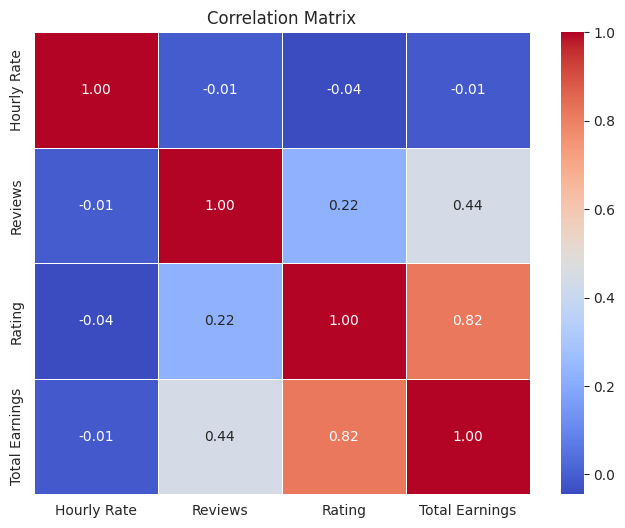

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset (replace 'your_dataset.csv' with actual file name)
df = pd.read_csv("processed_bio.csv")

# Compute correlation matrix
correlation_matrix = df[['Hourly Rate', 'Reviews', 'Rating', 'Total Earnings']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


We can observe that:
1. Strong Positive Correlation: Rating & Total Earnings (0.82)
  * Freelancers with higher ratings tend to have higher total earnings. This suggests that client satisfaction and positive reviews play a significant role in increasing overall earnings.

2. Moderate Positive Correlation: Reviews & Total Earnings (0.44)
  * More reviews are linked to higher total earnings, but the relationship is not as strong as with ratings. This could indicate that having many reviews helps, but the quality of those reviews (ratings) is more influential.
3. Weak Positive Correlation: Reviews & Rating (0.22)
  * There is a slight positive relationship between the number of reviews and the rating, meaning that freelancers with more reviews might have slightly better ratings, but it’s not a strong factor.
4. Negligible Correlation: Hourly Rate & Other Factors (-0.01 to -0.04)
  * Hourly rate does not significantly correlate with total earnings, rating, or reviews. This suggests that charging a higher rate doesn’t necessarily result in higher earnings or better reviews—instead, factors like reputation and work consistency matter more.

**Key Takeaways**

  * High ratings are a strong indicator of success (higher earnings).
  * More reviews contribute to earnings, but quality matters more than quantity.
  * Hourly rate alone is not a strong predictor of total earnings—freelancers should focus on building a strong profile, getting high ratings, and maintaining steady work.

#### **3- Graphical univariate**
These plots analyze one variable at a time, showing distributions or frequencies.

**- Histogram Analysis**


To visualize the distribution of the numerical columns, we plot histograms with Kernel Density Estimation (KDE) enabled. These histograms help in identifying trends, skewness, and outliers.

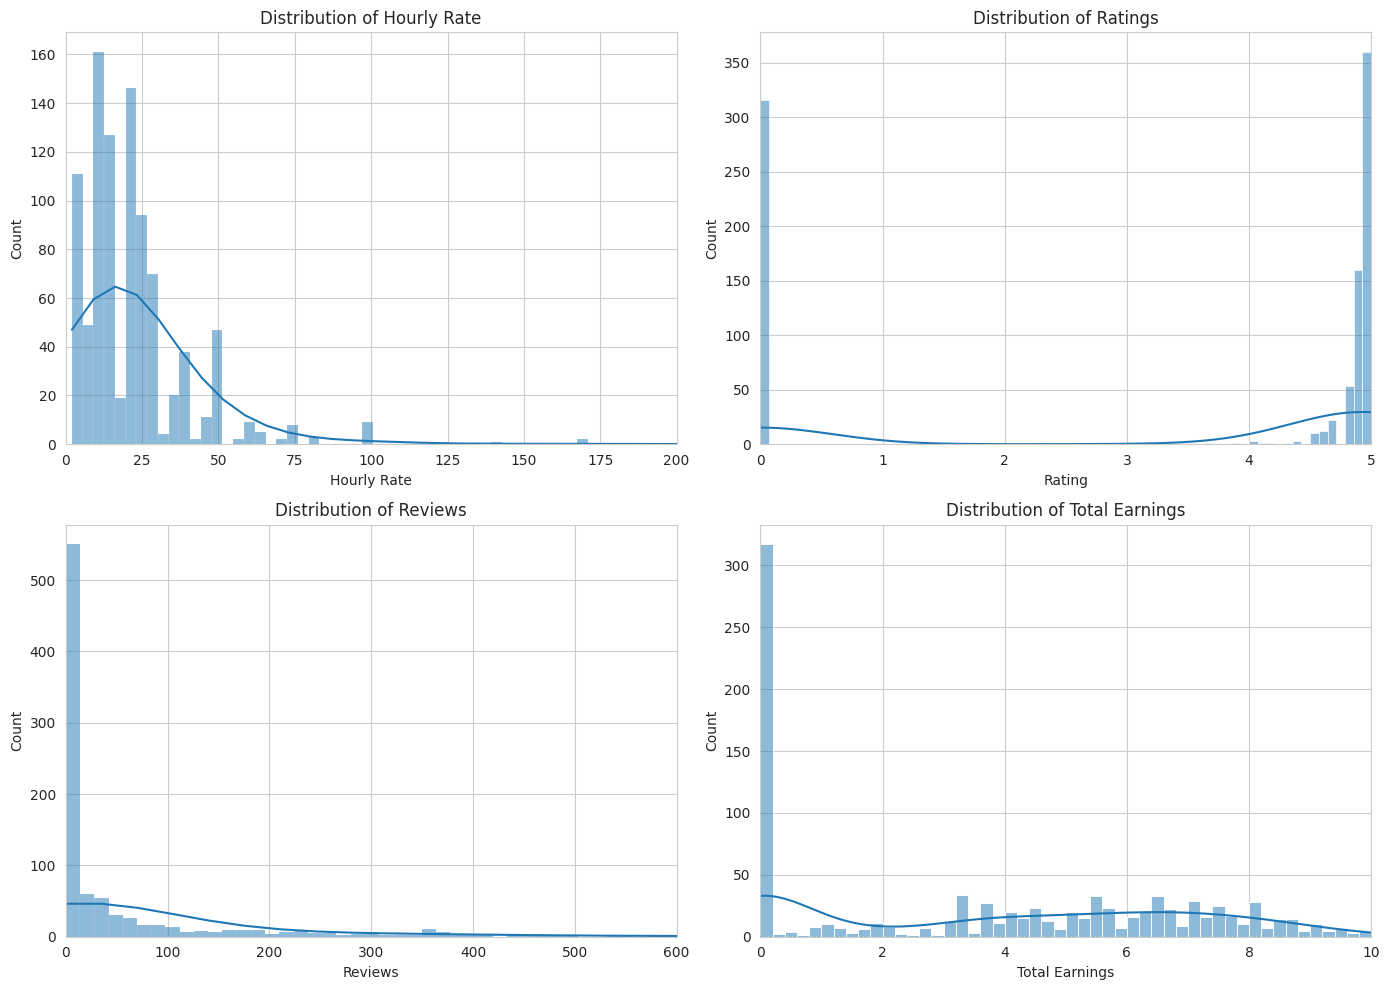

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

columns = ['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']
titles = ['Distribution of Hourly Rate', 'Distribution of Ratings', 'Distribution of Reviews', 'Distribution of Total Earnings']

# x-axis limits
x_limits = {
    'Hourly Rate': (0, 200),
    'Rating': (0, 5),
    'Reviews': (0, 600),
    'Total Earnings': (0, 10)
}

# bin sizes
bin_sizes = {
    'Hourly Rate': 400,
    'Rating': 70,
    'Reviews': 500,
    'Total Earnings': 50
}

for i, ax in enumerate(axes.flatten()):
    sns.histplot(df[columns[i]], bins=bin_sizes[columns[i]], kde=True, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel(columns[i])
    ax.set_xlim(x_limits[columns[i]])

plt.tight_layout()
plt.show()


We can observe that:

- Hourly Rate:
The distribution is **right-skewed**, indicating that most freelancers charge between 0 and 75 dollars per hour, while a few freelancers have significantly higher rates. There are some extreme outliers above 100, suggesting premium services or specialized skills.

- Rating:
The distribution of ratings is **bimodal**, with peaks at 0 and 5. This suggests that a significant portion of freelancers either have no reviews or a perfect rating. Very few freelancers have ratings in the mid-range (between 1 and 4), indicating that clients tend to either rate freelancers highly or not at all. This pattern highlights the polarized nature of client feedback in the freelancing market.

- Reviews:
The distribution of reviews is highly **right-skewed**, indicating that most freelancers receive very few reviews or no review at all, with the majority having fewer than 10 reviews. A small number of freelancers, however, stand out with hundreds of reviews, suggesting they are highly active or have established a strong reputation in the market. This highlights a significant disparity in review distribution among freelancers.


- Total Earnings:
The distribution of total earnings is **right-skewed**, with many freelancers earning equals to 0 and only a small number reaching the maximum cap of 10. This pattern suggests that only a small number of customers complete payments for projects or contests on Freelancer.com. This indicates that while many freelancers participate, only a fraction successfully complete and get paid for their work.

**- Boxplots for Outlier Detection**


Boxplots help visualize outliers and the overall spread of the data. Since extreme values were noticed in Hourly Rate and Total Earnings, boxplots will confirm the extent of these outliers.

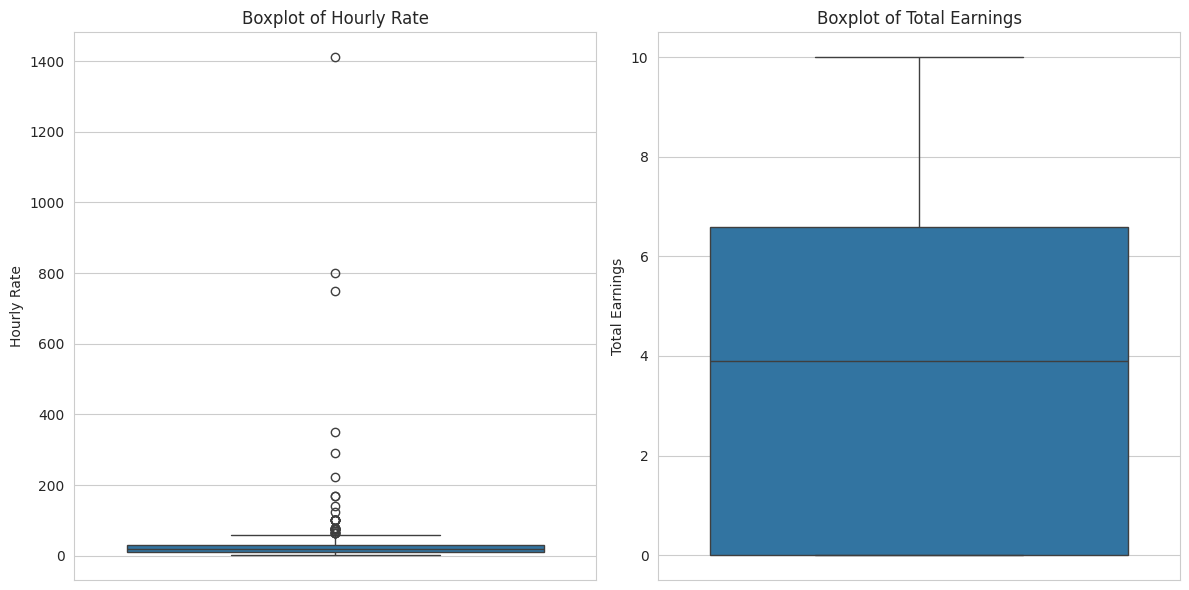

In [65]:
# Create boxplots for Hourly Rate and Total Earnings
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y=df["Hourly Rate"], ax=axes[0])
axes[0].set_title("Boxplot of Hourly Rate")

sns.boxplot(y=df["Total Earnings"], ax=axes[1])
axes[1].set_title("Boxplot of Total Earnings")

plt.tight_layout()
plt.show()


We can observe that:

Hourly Rate: There are many outliers above 100 dollars/hour, with some freelancers charging over 800 dollars/hour and even 1400 dollars/hour.

Total Earnings: The boxplot does not show extreme outliers due to the 10 dollars cap, but a small percentage of freelancers earn significantly more than the majority.
These insights suggest that income disparity is high in the freelance market, with a few top freelancers capturing most of the revenue.

**- Density Plots for Data Spread**

Density plots (KDE plots) provide a smooth representation of data distribution, highlighting concentration areas. Since Reviews and Total Earnings were highly skewed, we applied a logarithmic transformation to normalize their distribution. Log transformation compresses extreme values while preserving the overall structure, making patterns easier to interpret.

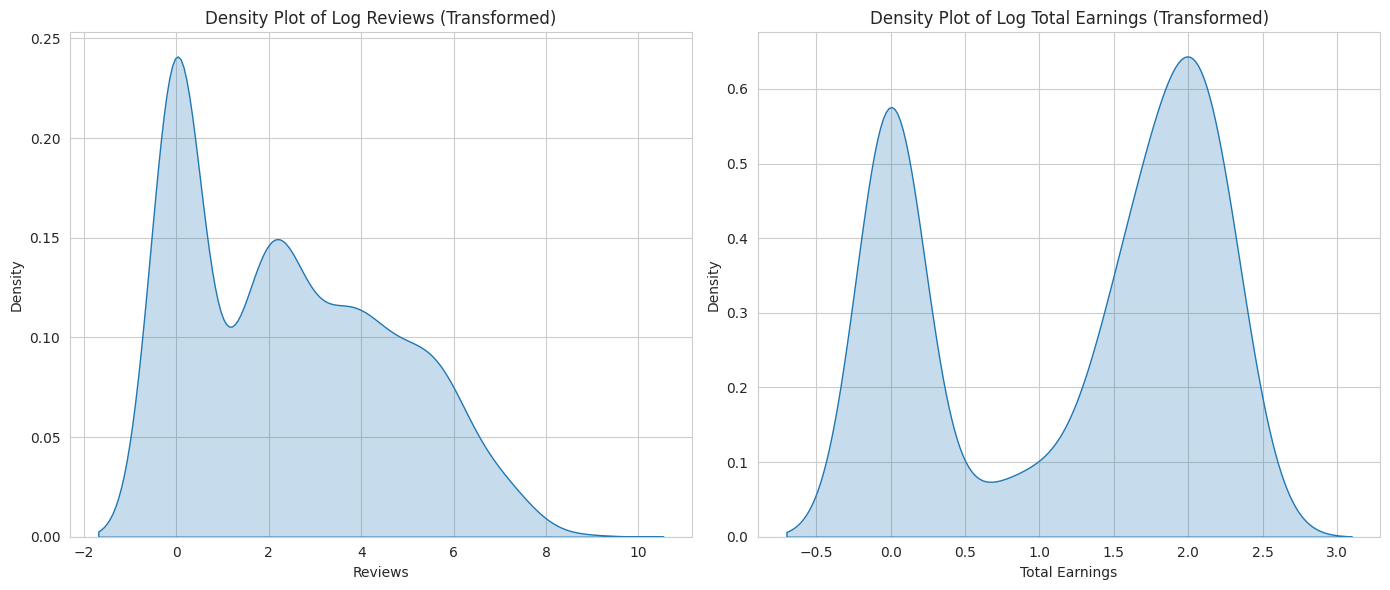

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Density plot for Log Reviews
sns.kdeplot(np.log1p(df['Reviews']), fill=True, ax=axes[0])
axes[0].set_title("Density Plot of Log Reviews (Transformed)")

# Density plot for Log Total Earnings
sns.kdeplot(np.log1p(df['Total Earnings']), fill=True, ax=axes[1])
axes[1].set_title("Density Plot of Log Total Earnings (Transformed)")

plt.tight_layout()
plt.show()


We can observe that:

- Log Reviews (Transformed):
The log-transformed reviews distribution still shows a skew, but it is now more interpretable. The presence of multiple peaks suggests that some freelancers receive very few reviews, while others accumulate significantly more.

- Log Total Earnings (Transformed):
The total earnings distribution is **bimodal**, with two peaks. One peak at lower values suggests that many freelancers earn minimal amounts, while the second peak suggests a separate group of higher-earning freelancers.

##### **- Choropleth Map: Distribution of Freelancers by Country**


The choropleth map visually represents the number of freelancers in each country. Darker shades indicate a higher number of freelancers, while lighter shades represent fewer freelancers.

In [67]:
import plotly.express as px

# Count freelancers per country
country_counts = df["Location"].value_counts().reset_index()
country_counts.columns = ["Country", "Freelancer Count"]

# Create choropleth map
fig = px.choropleth(country_counts,
                    locations="Country",
                    locationmode="country names",
                    color="Freelancer Count",
                    title="Distribution of Freelancers by Country",
                    color_continuous_scale="Blues")

# Align the title in the middle and make it bold
fig.update_layout(
    title_x=0.5,  # Center the title
)

# Show the figure
fig.show()

We can observe that:

freelancers are distributed across many countries, with the highest concentration in India (309 freelancers) and Pakistan (160 freelancers). Following these, Indonesia has 29 freelancers, and the USA has 23 freelancers.

##### **- Bar chart:**
 Bar chart is a graphical representation used to analyze the distribution of a single categorical variable. It displays distinct categories on the x-axis and their corresponding frequencies (counts or proportions) on the y-axis. This helps in identifying the most common and least common categories within the dataset.*italicized text*

###### (a) Top 10 most in-demand skills:


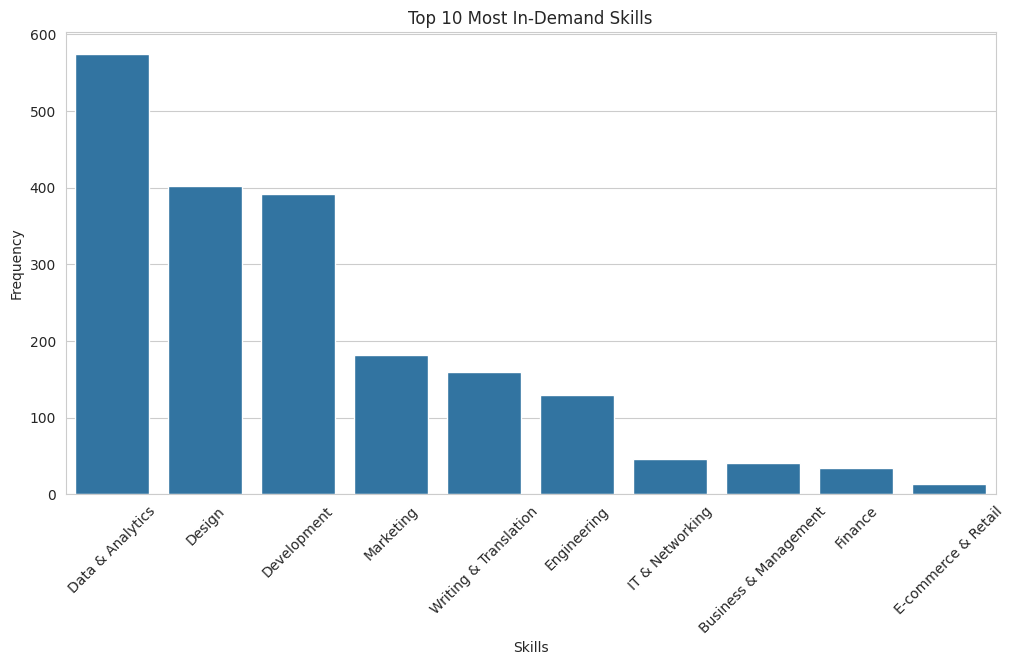

In [68]:
skill_counts = df["Skills"].str.split(", ").explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=skill_counts.index[:10], y=skill_counts.values[:10])
plt.xticks(rotation=45)
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.title("Top 10 Most In-Demand Skills")
plt.show()

We can observe that:

The chart shows that Data & Analytics and Design dominate the freelancing market, reflecting high demand for data-driven and creative skills for freelancers. Development and Marketing are also in demand, highlighting the need for technical and promotional expertise. Skills in Writing & Translation, Engineering, Business & Management, Finance, Economics, and Retail further demonstrate the diverse opportunities and dynamic nature of the freelancing market.

##### **- Boxplot:**
Boxplot is a graphical representation of the distribution of a single numerical variable. It displays the median, quartiles, and potential outliers, helping to identify skewness, spread, and anomalies in the data. The box represents the interquartile range (IQR), while whiskers extend to 1.5 times the IQR. Points outside this range are considered outliers.


###### (a) Average earning for single/muli-skilled freelancers

Average Earnings for Single Skill Freelancers: $4.19
Average Earnings for Multiple Skills Freelancers: $3.52
Freelancers with a single skill earn more on average.


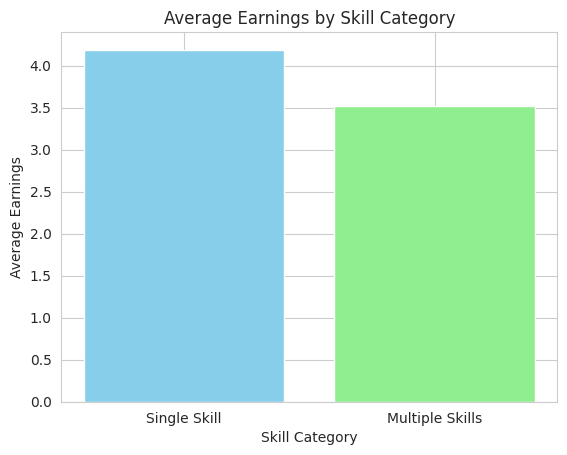

In [69]:
import pandas as pd

df = pd.read_csv("processed_bio.csv")

# Initialize variables to store total earnings and counts
single_skill_total = 0
single_skill_count = 0
multiple_skills_total = 0
multiple_skills_count = 0

# Iterate through the dataset
for index, row in df.iterrows():
    skills = row['Skills'].split(',')  # Split skills by comma
    earnings = row['Total Earnings']

    if len(skills) == 1:  # Single skill
        single_skill_total += earnings
        single_skill_count += 1
    else:  # Multiple skills
        multiple_skills_total += earnings
        multiple_skills_count += 1

# Calculate average earnings
single_skill_avg = single_skill_total / single_skill_count if single_skill_count > 0 else 0
multiple_skills_avg = multiple_skills_total / multiple_skills_count if multiple_skills_count > 0 else 0

# Output results
print(f"Average Earnings for Single Skill Freelancers: ${single_skill_avg:.2f}")
print(f"Average Earnings for Multiple Skills Freelancers: ${multiple_skills_avg:.2f}")

# Compare earnings
if single_skill_avg > multiple_skills_avg:
    print("Freelancers with a single skill earn more on average.")
elif single_skill_avg < multiple_skills_avg:
    print("Freelancers with multiple skills earn more on average.")
else:
    print("Both groups earn the same on average.")


# Data for visualization
categories = ['Single Skill', 'Multiple Skills']
averages = [single_skill_avg, multiple_skills_avg]

# Plot the results
plt.bar(categories, averages, color=['skyblue', 'lightgreen'])
plt.title('Average Earnings by Skill Category')
plt.xlabel('Skill Category')
plt.ylabel('Average Earnings')
plt.show()

We can observe that:

Freelancers with a single skill earn slightly more than those with multiple skills which having average earning 3.5. This could be because specializing in one skill leads to higher expertise and demand, while multi-skilled freelancers might spread their focus too thin. Certain specialized skills may also pay more. More research is needed to fully understand the reasons behind this trend.



##### **- Word cloud:**
A word cloud is a visualization technique that displays the most frequent words in a dataset, where the size of each word corresponds to its frequency. It is especially useful for analyzing categorical or textual data by highlighting commonly occurring terms.

###### (a) Most common freelance skills

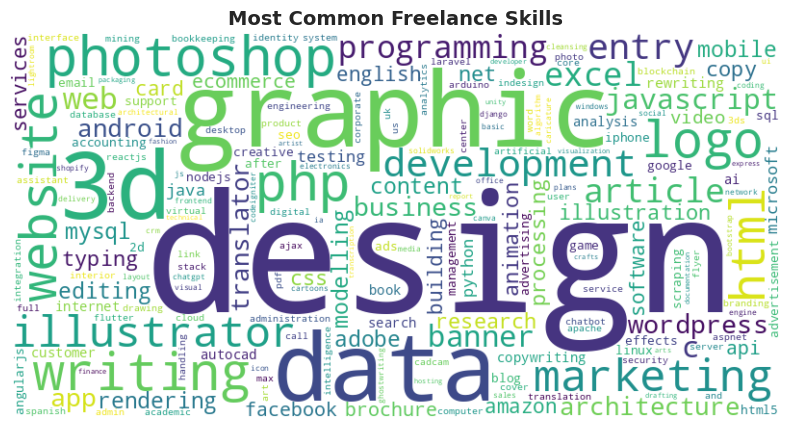

Skill Frequencies:
Counter({'design': 905, 'graphic': 247, 'data': 200, '3d': 194, 'photoshop': 180, 'php': 176, 'writing': 171, 'logo': 166, 'website': 157, 'html': 146, 'marketing': 123, 'illustrator': 122, 'development': 119, 'entry': 103, 'article': 92, 'excel': 88, 'programming': 87, 'web': 80, 'c': 77, 'banner': 76, 'javascript': 74, 'wordpress': 72, 'app': 70, 'business': 68, 'architecture': 61, 'translator': 60, 'android': 59, 'rendering': 58, 'content': 57, 'editing': 55, 'modelling': 54, 'adobe': 54, 'mobile': 54, 'mysql': 53, 'css': 50, 'illustration': 49, 'processing': 48, 'animation': 47, 'net': 45, 'copy': 44, 'typing': 43, 'research': 42, 'english': 40, 'services': 40, 'building': 39, 'card': 39, 'amazon': 39, 'software': 39, 'brochure': 38, 'api': 37, 'facebook': 37, 'ecommerce': 36, 'video': 34, 'testing': 33, 'microsoft': 33, 'python': 32, 'java': 32, 'rewriting': 31, 'copywriting': 31, 'autocad': 31, 'ai': 30, 'book': 30, 'internet': 30, 'search': 28, 'customer': 27,

In [70]:
# Install necessary libraries
!pip install wordcloud matplotlib pandas

# Import required libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter

# Create a DataFrame
data = pd.read_csv("https://raw.githubusercontent.com/iRoseM/Freelancing-Trends--IT362/main/Dataset/Raw_Dataset.csv")
df = pd.DataFrame(data)

# Normalize the text: convert to lowercase and remove punctuation
def normalize_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Handle NaN values and apply normalization to the "Skills" column
df["Skills"] = df["Skills"].fillna('')  # Replace NaN with empty string
df["Skills"] = df["Skills"].apply(normalize_text)

# Split skills into individual words and count their frequency
all_skills = " ".join(df["Skills"]).split()  # No need for dropna() since we filled NaNs
skill_frequencies = Counter(all_skills)

# Convert to a dictionary for WordCloud
skill_frequencies_dict = dict(skill_frequencies)

# Generate word cloud with normalized text
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    max_words=200,
).generate_from_frequencies(skill_frequencies_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Freelance Skills", fontsize=14, fontweight="bold")
plt.show()

# Print the skill frequencies for verification
print("Skill Frequencies:")
print(skill_frequencies)

We can observe that:

The word cloud shows "design" popping up most often (905 times), followed by "graphic" (247) and "data" (200), but these terms are pretty broad—"design" could mean anything from logos to databases, and "graphic" might cover animations or illustrations. That’s why, even though "data" ranks third here, column charts (which group skills like data analysis or machine learning under " Data & Analytics") make it look like the top field. Word clouds are great for spotting hot keywords, but they miss the nuance—like how " Data & Analytics" isn’t just one word. Pairing both methods helps balance the big trends with the specifics.



**- Choropleth Map: Distribution of Freelancers by Country**

#### **4- Graphical multivariate**
These plots analyze relationships between two or more variables.

##### **- Boxplot: Hourly Rate per Country**


The boxplot displays the distribution of freelancers' hourly rates across different countries. It shows the median, quartiles, and potential outliers for each country's rates.

<ipython-input-71-34be44054106>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




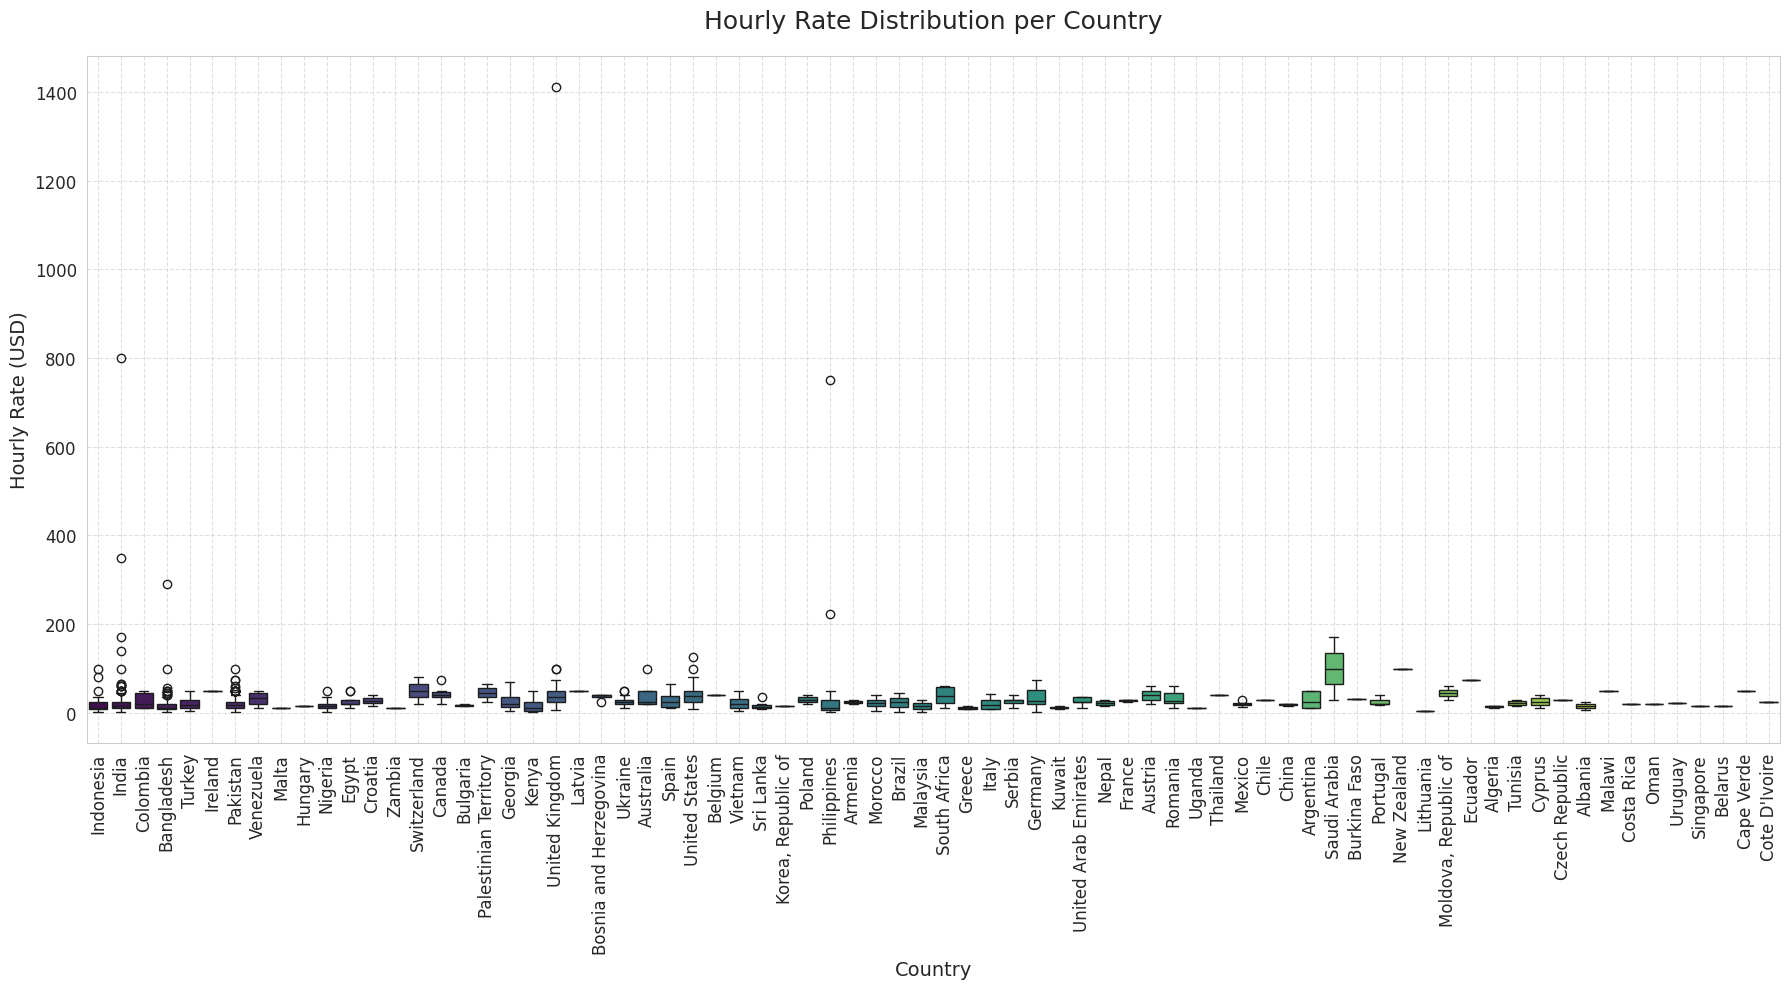

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("processed_bio.csv")

# Set figure size
plt.figure(figsize=(18, 10))  # Increase width and height for better visibility

# Create boxplot with a color palette
sns.boxplot(x="Location", y="Hourly Rate", data=df, palette="viridis")

# Improve text visibility
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Increase font size of y-axis labels

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add labels and title with improved formatting
plt.xlabel("Country", fontsize=14)
plt.ylabel("Hourly Rate (USD)", fontsize=14)
plt.title("Hourly Rate Distribution per Country", fontsize=18, pad=20)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

We can observe that:

The distribution of freelancers' hourly rates varies significantly across countries, with notable outliers exceeding $1400 per hour in the UK. Countries like the United States, United Kingdom, and Switzerland tend to have higher median rates, while South Asian and African countries generally offer lower rates due to market competition. However, these figures vary depending on the number of data points and their distribution. Overall, the data highlights global disparities in freelancer earnings, with specialized skills commanding premium rates in certain regions.

##### **- Boxplot: Total Earnings per Country**


This boxplot visualizes the distribution of total earnings for freelancers in different countries. It provides insights into which countries have higher-earning freelancers and identifies outliers.

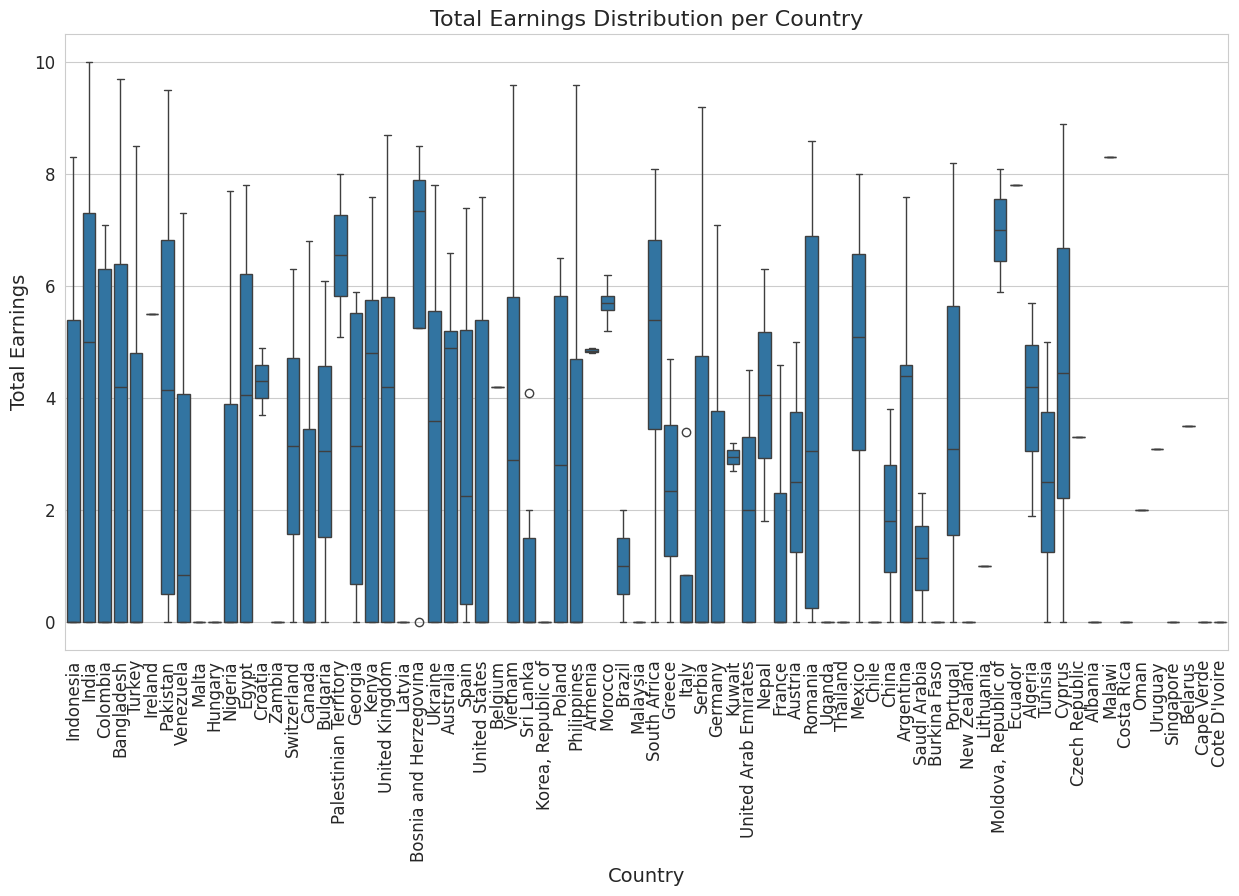

In [72]:
# the figure size
plt.figure(figsize=(15, 8))  # Increase width and height

# Create boxplot
sns.boxplot(x="Location", y="Total Earnings", data=df)

# Improve text visibility
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Increase font size of y-axis labels
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total Earnings", fontsize=14)
plt.title("Total Earnings Distribution per Country", fontsize=16)

plt.show()

We can observe that:

The distribution of freelancer earnings varies significantly across countries, with notable disparities influenced by market demand and skill specialization. Countries like the United States, United Kingdom, and Switzerland exhibit higher median earnings, while others show lower and more varied income levels. The presence of outliers suggests that a small group of high-earning freelancers significantly impacts overall distribution. These individuals likely possess specialized skills or cater to high-paying international clients. Overall, economic conditions, competition, and expertise play key roles in shaping freelancer earnings globally.

##### **- Scatter Plots For Trends:**
Scatter plots are used to visually explore trends and relationships between different variables. By plotting Rating vs. Total Earnings, Reviews vs. Hourly Rate, and Skills Count vs. Total Earnings, we can observe potential patterns, outliers, or dependencies that might not be immediately evident from raw data. These visualizations help in identifying meaningful insights for further analysis.

###### (a) Rating vs. Total Earnings

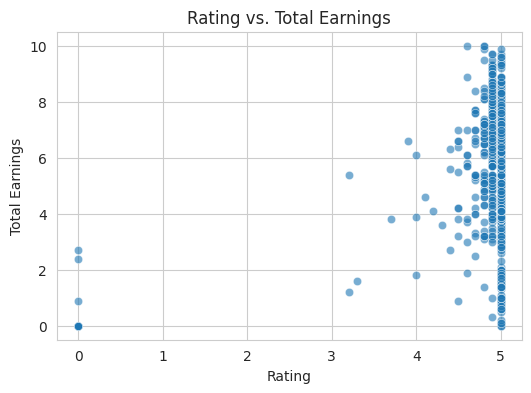

In [73]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Rating", y="Total Earnings", alpha=0.6)
plt.title("Rating vs. Total Earnings")
plt.xlabel("Rating")
plt.ylabel("Total Earnings")
plt.show()

We can observe that:
  * The majority of the ratings are clustered around 5, with a few instances of lower ratings.
  * Higher total earnings seem to be associated with ratings close to 5, while lower ratings correspond to lower earnings.
  * There are a few outliers at very low ratings, but they do not seem to have high total earnings.

###### (b) Reviews vs. Hourly Rate


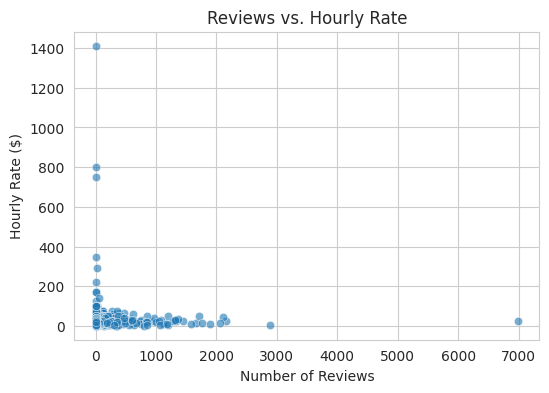

In [74]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Reviews", y="Hourly Rate", alpha=0.6)
plt.title("Reviews vs. Hourly Rate")
plt.xlabel("Number of Reviews")
plt.ylabel("Hourly Rate ($)")
plt.show()

We can observe that:
  * Most of the data points are concentrated at lower hourly rates.
  * There are a few extreme outliers where the hourly rate is significantly high.
  * A higher number of reviews does not necessarily correlate with higher hourly rates.

###### (c) Skills Count vs. Total Earnings

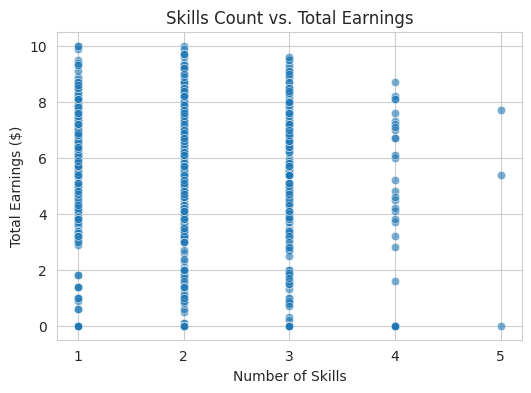

In [75]:
df['Skills Count'] = df['Skills'].apply(lambda x: len(str(x).split(',')))

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x=pd.Categorical(df['Skills Count'], ordered=True), y="Total Earnings", alpha=0.6)

plt.xticks(sorted(df['Skills Count'].unique()))  # Ensuring the x-axis is sorted numerically
plt.title("Skills Count vs. Total Earnings")
plt.xlabel("Number of Skills")
plt.ylabel("Total Earnings ($)")
plt.show()

We can observe that:
  * For each specific skill count, total earnings vary widely. This indicates that the number of skills alone does not solely determine earnings—other factors like skill relevance, experience, or market demand may also play a role.
  * Higher skill counts show a slight trend toward increased earnings, but not strictly linear.  
  * High earners exist across all skill levels, suggesting skill value matters more than quantity.

###**5.Processing**

<!-- Outliers are extreme values that can significantly impact data analysis and model performance. In this step, we identify and handle outliers in the dataset using the Interquartile Range (IQR) method with custom multipliers. Instead of removing all outliers, we apply capping (Winsorization) to ensure that extreme values do not distort our analysis while keeping most data points. However, we make an exception for one extreme outlier—a freelancer with an hourly rate of $1411, which is unrealistic and could distort our findings. -->

#### **- Outlier Handling:**

**Detecting Outliers Using Custom IQR Multipliers**

The Interquartile Range (IQR) method is used to detect outliers by computing the 25th percentile (Q1) and 75th percentile (Q3). Traditionally, outliers are defined as values beyond 1.5 × IQR, but in our case, we adjust the thresholds for each column based on its natural variation.

Custom IQR Multipliers per Column

| Column          | IQR Multiplier | Reasoning |
|----------------|--------------|-----------|
| **Hourly Rate**   | 2.0 × IQR   | Allows slightly higher hourly rates as variation is expected. |
| **Rating**        | 1.5 × IQR   | Ratings are between **0-5**, so a stricter limit is used. |
| **Reviews**       | 3.0 × IQR   | Some freelancers naturally receive many reviews, so we allow more variation. |
| **Total Earnings**| 2.5 × IQR   | High earnings are expected but should be controlled. |

In [76]:
numeric_cols = ['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define custom multipliers for each column
iqr_multipliers = {
    "Hourly Rate": 2.0,
    "Rating": 1.5,
    "Reviews": 3.0,
    "Total Earnings": 2.5
}

lower_bounds = {}
upper_bounds = {}

for col in numeric_cols:
    lower_bounds[col] = Q1[col] - iqr_multipliers[col] * IQR[col]
    upper_bounds[col] = Q3[col] + iqr_multipliers[col] * IQR[col]

print("\n Number of outliers detected per column (with custom thresholds):")

outlier_dict = {}

for col in numeric_cols:
    outliers_col = df[(df[col] < lower_bounds[col]) | (df[col] > upper_bounds[col])]
    num_outliers = outliers_col.shape[0]
    print(f"   ➜ {col}: {num_outliers} outliers")

    if num_outliers > 0:
        outlier_dict[col] = outliers_col

for col, outliers_data in outlier_dict.items():
    print(f"\n Detected Outliers for: {col} (showing first 10 rows)")
    display(outliers_data.head(10))


 Number of outliers detected per column (with custom thresholds):
   ➜ Hourly Rate: 30 outliers
   ➜ Rating: 0 outliers
   ➜ Reviews: 105 outliers
   ➜ Total Earnings: 0 outliers

 Detected Outliers for: Hourly Rate (showing first 10 rows)


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio,Skills Count
19,niveditajha1,100,"Data & Analytics, Development",India,0.0,0.0,0.0,mathematics stuff cofounder science minor cor...,2
27,timoboehme,80,"Development, Design, Data & Analytics",Switzerland,5.0,17.0,6.3,ability experience required tenure team net c...,3
29,CheekyCreative,75,"Data & Analytics, Design, Marketing",Canada,0.0,0.0,0.0,ability still raw wildernessbecause company b...,3
104,wcorp,125,"Business & Management, Development, Engineering",United States,5.0,3.0,5.1,flow experience inhouse family often camping ...,3
281,Adriansyahrial,80,"Marketing, Design, Data & Analytics, Engineering",Indonesia,0.0,0.0,0.0,validation engineering improvement knowing le...,4
283,codingcow,100,Development,United Kingdom,5.0,16.0,7.0,cloud exactly security management secure cons...,1
290,Klaus,75,"Development, Data & Analytics",Germany,5.0,59.0,7.1,experience also less ninjatrader trading expe...,2
318,Pateltwinkal2102,1411,Data & Analytics,United Kingdom,0.0,0.0,0.0,assisting may handling meeting staff responsi...,1
342,CiaranFar,100,"Data & Analytics, Design, Engineering",New Zealand,0.0,0.0,0.0,experience team joinery working installation ...,3
348,rajneeshb,350,"Writing & Translation, Data & Analytics",India,0.0,0.0,0.0,experience usercentric solving team developin...,2



 Detected Outliers for: Reviews (showing first 10 rows)


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio,Skills Count
9,QualityHub,20,"Writing & Translation, Data & Analytics",Pakistan,4.9,459.0,6.8,writing experience source objective cheap als...,2
20,durgapukamalakar,60,"Data & Analytics, Design",India,5.0,295.0,7.6,experience pm company html freelancercom topt...,2
51,arijit81,15,"Development, Design, Data & Analytics",India,4.9,1128.0,9.2,experience tangible team introducing platform...,3
53,usuf001,25,"Development, Data & Analytics",India,5.0,945.0,7.9,experience platform source seasoned codeignit...,2
54,Iwori,45,"Data & Analytics, Development",Venezuela,5.0,358.0,7.3,experience science working different create n...,2
59,sweta2317,30,"Development, Design, Data & Analytics",India,4.9,1325.0,9.3,engine team lab showing offering signature in...,3
122,faizythebest,50,"Development, Engineering, Data & Analytics",Pakistan,5.0,1191.0,8.9,experience crossplatform custom task backend ...,3
125,dfordesigners,25,"Development, Design",Pakistan,4.9,361.0,8.6,secure database captivating regard seo custom...,2
139,rsinfotechindia,24,Design,India,4.8,361.0,7.2,flow experience creativity versatility brochu...,1
183,jbosseu,35,"Development, IT & Networking",India,5.0,583.0,7.4,cloud large team security part working concen...,2


Observations:

Outliers are extreme values that can significantly impact data analysis and model performance. In this step, we identify and handle outliers in the dataset using the Interquartile Range (IQR) method with custom multipliers. For one extreme outlier a freelancer with an hourly rate of $1411, we decided to remove it because it is unrealistic and could distort our findings. However, for reviews and hourly rate we left it becase we consederd it in the normal range but we would smooth it when structuring the data models by capping the values.

<!--
 Instead of removing all outliers, we apply capping (Winsorization) to ensure that extreme values do not distort our analysis while keeping most data points. However, we make an exception for one extreme outlier—a freelancer with an hourly rate of $1411, which is unrealistic and could distort our findings. This record is removed before processing. -->

**Handling Outliers:** Removing the Extreme Outlier

<!-- **Handling Outliers: Removing the Extreme Outlier and Capping the Rest** -->
To handle the detected outliers, we remove the extreme freelancer with a rate of $1411 before applying capping (Winsorization). Capping replaces extreme values with predefined limits instead of removing them, ensuring:
<!--
All reasonable data points are preserved (except for the extreme case).
Extreme values do not skew analysis but remain within controlled ranges.
Dataset maintains statistical consistency while reducing distortions. -->

In [77]:
# Remove the freelancer with an extreme Hourly Rate of 1411
df = df.loc[df['Hourly Rate'] != 1411].copy()

# Save the modified dataset
print("\n Sample rows after capping outliers:")
display(df.head(10))



 Sample rows after capping outliers:


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio,Skills Count
0,artdjuna,30,"Data & Analytics, Design",Indonesia,4.9,171.0,8.3,experience best hobby less trying satisfied s...,2
1,kkwebart09,15,Design,India,4.9,17.0,6.4,experience creativity source brochure concern...,1
2,enervell,50,Development,Colombia,5.0,27.0,6.3,microservices experience secure platform pipe...,1
3,sharminnaharm,10,Design,Bangladesh,4.9,138.0,6.8,creativity browse brochure working nt hire co...,1
4,ancineha,15,"Engineering, Design, Development, Marketing, D...",India,5.0,71.0,7.7,experience sas team platform star providing m...,5
5,Kubragull,50,"Data & Analytics, Design, Engineering",Turkey,4.5,55.0,6.4,welcome drawing high thank designer front inc...,3
6,mdsadikulislamss,10,Design,Bangladesh,5.0,15.0,5.5,business brochure designer sadikul different ...,1
7,trivediheenalove,20,"Marketing, Development, Data & Analytics",India,5.0,4.0,5.5,marketing team database front providing m jes...,3
8,RMMcontractors,50,"Development, Data & Analytics",Ireland,5.0,7.0,5.5,experience gmt providing various engineering ...,2
9,QualityHub,20,"Writing & Translation, Data & Analytics",Pakistan,4.9,459.0,6.8,writing experience source objective cheap als...,2


Observations:

- The freelancer charging $1411 per hour has been removed to prevent distortion in analysis.
- Capping (Winsorization) has been applied after removal, ensuring that remaining outliers are controlled within reasonable limits.
- Hourly Rate outliers have been adjusted, keeping most freelancers within a practical price range.
- Review counts are now more balanced, preventing a few highly-rated freelancers from overshadowing others.
- The dataset remains balanced and representative, avoiding extreme fluctuations caused by unrealistic pricing.

#### **- Normalization:**

Normalization scales numerical columns like Hourly Rate, Rating, Reviews, and Total Earnings to a range of 0 to 1 using Min-Max Scaling. This ensures features with different scales contribute equally, preventing bias in algorithms like clustering or classification. This step prepares the dataset for accurate and fair analysis when constructing modeling algorithems.

In [78]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


# # Reload the raw dataset to extract original values
# df_raw = pd.read_csv("https://raw.githubusercontent.com/iRoseM/Freelancing-Trends--IT362/main/Dataset/Raw_Dataset.csv")

# # Define numerical columns
# numerical_columns = ["Hourly Rate", "Location", "Reviews", "Total Earnings"]

# # Ensure "Hourly Rate" is numeric
# df_raw["Hourly Rate"] = df_raw["Hourly Rate"].str.extract("(\d+)").astype(float)

# # Store original min and max values
# original_min_values = df_raw[numerical_columns].min()
# original_max_values = df_raw[numerical_columns].max()



# # Load the dataset
# df = pd.read_csv('cleaned_dataset.csv')

# # Step 1: Normalize Numerical Columns
# # Columns to normalize: 'Hourly Rate', 'Rating', 'Reviews', 'Total Earnings'
# numerical_columns = ['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']

# # Apply Min-Max Scaling (range: 0 to 1)
# scaler = MinMaxScaler()
# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# print("\nDataset after Normalization:")
# print(df.head(10))

# Store original min and max values BEFORE normalization
original_values = {
    'min': df[['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']].min(),
    'max': df[['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']].max()
}

# Normalize numerical columns
numerical_columns = ['Hourly Rate', 'Rating', 'Reviews', 'Total Earnings']
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display results
print("\nOriginal min/max values:")
print("Min values:")
print(original_values['min'])
print("\nMax values:")
print(original_values['max'])

print("\nDataset after normalization:")
display(df.head(10))

# Save processed data if needed
df.to_csv("normalized.csv", index=False)


Original min/max values:
Min values:
Hourly Rate       2.0
Rating            0.0
Reviews           0.0
Total Earnings    0.0
dtype: float64

Max values:
Hourly Rate        800.0
Rating               5.0
Reviews           6995.0
Total Earnings      10.0
dtype: float64

Dataset after normalization:


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio,Skills Count
0,artdjuna,0.035088,"Data & Analytics, Design",Indonesia,0.98,0.024446,0.83,experience best hobby less trying satisfied s...,2
1,kkwebart09,0.016291,Design,India,0.98,0.002430,0.64,experience creativity source brochure concern...,1
2,enervell,0.060150,Development,Colombia,1.00,0.003860,0.63,microservices experience secure platform pipe...,1
3,sharminnaharm,0.010025,Design,Bangladesh,0.98,0.019728,0.68,creativity browse brochure working nt hire co...,1
4,ancineha,0.016291,"Engineering, Design, Development, Marketing, D...",India,1.00,0.010150,0.77,experience sas team platform star providing m...,5
5,Kubragull,0.060150,"Data & Analytics, Design, Engineering",Turkey,0.90,0.007863,0.64,welcome drawing high thank designer front inc...,3
6,mdsadikulislamss,0.010025,Design,Bangladesh,1.00,0.002144,0.55,business brochure designer sadikul different ...,1
7,trivediheenalove,0.022556,"Marketing, Development, Data & Analytics",India,1.00,0.000572,0.55,marketing team database front providing m jes...,3
8,RMMcontractors,0.060150,"Development, Data & Analytics",Ireland,1.00,0.001001,0.55,experience gmt providing various engineering ...,2
9,QualityHub,0.022556,"Writing & Translation, Data & Analytics",Pakistan,0.98,0.065618,0.68,writing experience source objective cheap als...,2


#### **- Encoding:**

Encoding converts categorical data into numeric values for analysis. We used LabelEncoder on the Location column to transform categorical location names into numerical labels. For the Skills column, we focused on the count of skills by splitting the comma-separated values and defaulting to 0 for missing entries. This prepares the dataset for machine learning or further analysis.

In [79]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the location column
df['Location'] = label_encoder.fit_transform(df['Location'])

df['Skills'] = df['Skills'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)

df.to_csv("Processed_Dataset.csv", index=False)

print("\nDataset after encoding:")
print(df.head(10))




Dataset after encoding:
    Freelancer Name  Hourly Rate  Skills  Location  Rating   Reviews  \
0          artdjuna     0.035088       2        31    0.98  0.024446   
1        kkwebart09     0.016291       1        30    0.98  0.002430   
2          enervell     0.060150       1        17    1.00  0.003860   
3     sharminnaharm     0.010025       1         6    0.98  0.019728   
4          ancineha     0.016291       5        30    1.00  0.010150   
5         Kubragull     0.060150       3        64    0.90  0.007863   
6  mdsadikulislamss     0.010025       1         6    1.00  0.002144   
7  trivediheenalove     0.022556       3        30    1.00  0.000572   
8    RMMcontractors     0.060150       2        32    1.00  0.001001   
9        QualityHub     0.022556       2        49    0.98  0.065618   

   Total Earnings                                                Bio  \
0            0.83   experience best hobby less trying satisfied s...   
1            0.64   experience creativ

----
### **Hypotheses Generated:**
Hypothesis1 : Freelancers with a higher number of reviews are more likely to acquire new clients, leading to increased total earnings.

- Independent Variable:  number of reviews
- Dependent Variable: total earnings

Hypothesis2: Freelancer earnings and hourly rates are influenced by a country's economic conditions, where freelancers in countries with higher GDP per capita tend to charge higher rates and earn more.

- Independent Variable: Economic conditions (measured by GDP per capita).
- Dependent Variable: Freelancer earnings and hourly rates.

Hypothesis 3: A small percentage of top freelancers dominate earnings and reviews, creating barriers for new freelancers to compete.

- Independent Variable: Freelancer rank based on earnings and reviews
- Dependent Variable: Market share (earnings and review distribution)

Hypothesis 4: Freelancers specializing in a single skill tend to earn higher profits than those with multiple skills due to the demand for deep expertise in specific fields.

- Independent Variable: Number of skills listed by a freelancer
- Dependent Variable: Freelancer income levels


----

### **6.Modelling**

### - Regression Models:


Hypothesis:
> Freelancers with higher ratings and more client reviews tend to earn significantly more.

Client feedback, in the form of ratings and reviews, reflects a freelancer's trustworthiness, reliability, and overall quality of service. These performance indicators are likely to influence the amount and quality of future job opportunities, leading to higher earnings.


**Modeling Approach:**
- **Target variable:** `Total Earnings` (continuous)
- **Key predictors:**
  - `Rating`
  - `Reviews`
- **Methods to be used:**
  - Baseline Linear Regression Model
  - Random Forest Regression
  - Gradient Boosting Regression (XGBoost)


**Evaluation Metrics:**
- RMSE (Root Mean Squared Error)
- R² Score


### **1. Baseline Model**

Before applying complex models, we establish a simple baseline using Linear Regression. This model assumes a linear relationship between inputs (Rating, Reviews) and the output (Total Earnings).

**Steps:**

1- Splitting the data into training and testing sets.

2- Training the baseline model (Linear Regression).

3- Evaluating the model using  or RMSE/R² .

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features
features = ['Rating', 'Reviews']
X = df[features]
y = df['Total Earnings']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train baseline Linear Regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Evaluate the model
y_pred = baseline_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Baseline Model RMSE: {rmse:.4f}")
print(f"Baseline Model R² Score: {r2:.4f}")


Baseline Model RMSE: 0.2108
Baseline Model R² Score: 0.5596




#### **Interpretation:**
The Linear Regression model gives us a performance benchmark which is ..... If the R² is low or RMSE is high, this suggests the relationship is not linear, and more complex models may better capture the underlying patterns.

This means the model explains around 56% of the variance in freelancer earnings. While this shows some predictive ability, the moderate R² and relatively high RMSE suggest that the relationship between features and earnings is not fully linear, indicating room for improvement using more complex models.



### **2. Advanced Regression Models**



After establishing a baseline model, we now develop two different regression models to improve the prediction of Total Earnings based on freelancers’ skill profiles.

#### **2.1 Random Forest Regression**

Random Forest builds multiple decision trees and averages their predictions, making it robust against overfitting and capable of modeling nonlinear patterns.

In [81]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_preds = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

print("Random Forest Results:")
print(f"R² Score: {rf_r2:.5f}")
print(f"MSE: {rf_mse:.6f}")


Random Forest Results:
R² Score: 0.93254
MSE: 0.006810


This is a significant improvement over the baseline. The high R² score indicates that the model explains over 93% of the variance in the data, and the very low MSE confirms its ability to accurately capture complex, nonlinear relationships between performance metrics (like rating and reviews) and freelancer earnings.

#### **2.2 Gradient Boosting Regression (XGBoost)**

XGBoost is a boosting method that sequentially builds trees, each trying to correct the errors of the previous one. It is often more accurate and efficient than Random Forest, especially in structured datasets.

In [82]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_preds = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)

print("XGBoost Results:")
print(f"R² Score: {xgb_r2:.5f}")
print(f"MSE: {xgb_mse:.6f}")


XGBoost Results:
R² Score: 0.92777
MSE: 0.007290


The XGBoost model performs nearly as well as Random Forest, confirming its strength in handling structured data and capturing subtle patterns. Its slightly lower R² and higher MSE compared to Random Forest still make it a strong predictive model and a significant improvement over the baseline.

###**3. Selecting the Best-Performing Model for Prediction**

After evaluating all three regression models using R² and RMSE as performance metrics, the model that demonstrates the best performance for predicting freelancer total earnings is the Random Forest Regression model.

**Model Comparison Summary**

| Model              | R² Score | RMSE    | MSE     |
|-------------------|----------|---------|---------|
| Linear Regression | 0.5596   | 0.2108  | 0.0444  |
| Random Forest     | 0.9325   | 0.0775  | 0.0060  |
| XGBoost           | ~0.9277  | ~0.0848 | ~0.0072 |





- Random Forest achieves the highest R² score (0.9325), meaning it explains over 93% of the variance in freelancer earnings based on ratings and reviews.

- It also has the lowest RMSE (0.0775) and MSE (0.0060), indicating strong predictive accuracy with minimal error.

- While XGBoost also performs well, its slightly lower R² and higher RMSE make Random Forest the more effective option for this dataset.

- The Linear Regression model, while useful as a baseline, performed significantly worse, confirming the importance of using nonlinear models for capturing the relationships in the data.
**bold text**


The Random Forest model is selected as the final predictive model because it best captures the complex, nonlinear relationships between freelancer performance indicators and their total earnings.

This result strongly supports the original hypothesis:
> *Freelancers with higher client ratings and more reviews tend to earn significantly more.*

The model’s ability to explain over 93% of the variation in earnings shows that ratings and reviews are strong and reliable predictors. This supports what we’d expect: client feedback helps build trust and credibility, which leads to more work and higher pay. The results show that even small improvements in rating or number of reviews can lead to noticeably higher earnings.

This gives both a useful prediction and practical advice. Freelancers should aim to get more positive reviews and keep their ratings high to improve their chances of earning more.


---

### - Clustering Models:

### **1. K-Means algorithm**

K-Means is an unsupervised machine learning algorithm used for clustering data points into groups based on their similarity. It works by iteratively assigning data points to k clusters, where k is a predefined number. The algorithm minimizes the distance between points within a cluster while maximizing the distance between clusters.

The main steps in K-Means are:

1. Initialize k cluster centroids randomly.
2. Assign each data point to the nearest centroid based on distance (typically Euclidean distance).
3. Recalculate centroids as the average position of all points in a cluster.
4. Repeat steps 2 and 3 until centroids stabilize (i.e., assignments do not change).

To determine the optimal number of clusters (k), methods like the Elbow Method and Silhouette Score are used, which help evaluate the quality of clustering.



In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/iRoseM/Freelancing-Trends--IT362/main/Dataset/Processed_Dataset.csv")


# Selecting relevant numerical features for clustering
features = ['Total Earnings', 'Reviews']
X = df[features]

# Standardize the data for better clustering performance
# scaler = StandardScaler()
# X = scaler.fit_transform(X)


Our current step is to scale the attribute to standarize them, Scaling ensures that all attributes are on a similar scale, preventing any single attribute from dominating the clustering process due to differences in magnitude. Standardization enhances the effectiveness of clustering by allowing each attribute to contribute equally to the analysis, thereby improving the accuracy and interpretability of the clusters.

#### Elbow Method

The Elbow Method helps determine the best number of clusters by plotting Within-Cluster Sum of Squares (WCSS) for different k values.
The elbow point (where the WCSS curve starts flattening) suggests the best k.

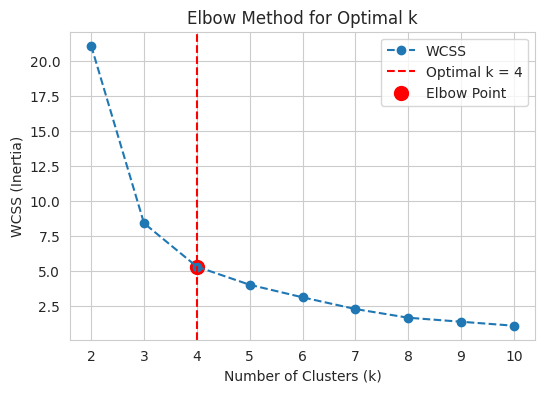

In [84]:
!pip install kneed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Define range of k values
k_values = range(2, 11)
wcss = []

# Compute Within-Cluster Sum of Squares (WCSS) for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Use KneeLocator to find the optimal k
knee_locator = KneeLocator(k_values, wcss, curve='convex', direction='decreasing')
optimal_k = knee_locator.knee

# Plot the Elbow Curve with highlighted optimal k
plt.figure(figsize=(6, 4))
plt.plot(k_values, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f"Optimal k = {optimal_k}")
plt.scatter(optimal_k, knee_locator.knee_y, color='red', s=100, label="Elbow Point")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()


#### Silhoutte Score
The Silhouette Score measures how well-defined clusters are, with higher scores indicating better separation.
A graph of silhouette scores for different k values helps confirm the best clustering choice.

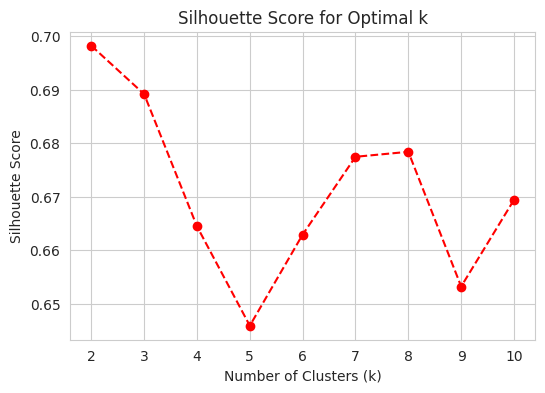

In [85]:
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the Silhouette Score
plt.figure(figsize=(6,4))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

We can observe that the highest Silhoutte score is ~0ز698 for \( k = 2 \), indicating that  \( k = 2 \) will be our first choice for K-means clustering.

By considering these three valuse \( k = 2  from the Elbow Method and k = 4 from the Silhoutte Score), we aim to explore a range of clustering outcomes, ensuring we capture diverse cluster formations and maximize the overall clustering performance.

#### K Visualization, and Evaluation:  

In this section, we will perform K-means clustering using the three pre-determined values for \( K \) and visualize the resulting clusters. To evaluate the performance of the clustering, we will calculate metrics such as the Within-Cluster Sum of Squares (WSS) and the average Silhouette score for each configuration. These metrics will help us assess the quality and effectiveness of the clusters.

##### k=4

In [86]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=4
kmeans = KMeans(n_clusters=4, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(X)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[1.77173913e-02 1.24118159e-04]
 [6.12446352e-01 1.08670510e-02]
 [8.26521739e-01 7.58838389e-02]
 [3.75597826e-01 1.37714827e-03]]

Cluster Labels:
[2 1 1 1 2 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 2 3 3 3 3 1 0 1 3 0 3 2 1 3 3 1 1
 1 1 1 0 0 3 1 1 2 0 3 2 0 2 2 2 2 2 1 2 1 1 2 3 1 1 1 1 3 3 3 3 3 0 0 0 0
 0 3 0 3 3 0 1 2 3 3 1 3 1 3 1 1 0 0 0 0 0 0 3 0 0 3 0 0 0 0 1 0 3 0 0 0 0
 1 0 3 0 0 0 0 0 0 1 2 2 3 2 2 2 2 2 1 1 1 2 1 3 3 3 1 1 2 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 3 3 3 1 2 1
 1 3 1 1 3 0 0 0 0 0 0 0 0 0 0 1 0 3 3 3 1 0 1 3 0 0 3 0 0 0 0 0 0 0 0 3 1
 3 1 0 1 3 3 0 3 0 0 0 0 0 0 3 0 0 0 1 2 3 1 3 1 2 3 1 2 1 2 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 0 1 3 0 1 2 1 1 1 1
 2 1 1 2 0 1 0 0 0 0 0 0 0 3 1 2 0 1 1 2 0 1 0 0 0 1 2 2 2 2 2 1 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 3 2 2 1 2 2 3 2 2
 3 1 2 1 1 1 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 3 3 1 1 1 1
 3 3 3 1

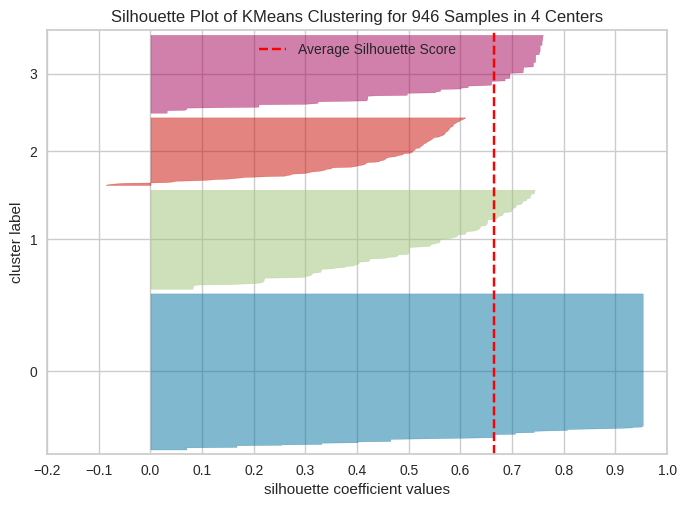

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 946 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [87]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 5.285959333426594
Average Silhouette Score: 0.6642172179400736


##### k=2

In [89]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(X)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[6.02764977e-02 2.31567644e-04]
 [6.35234375e-01 2.91951003e-02]]

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1
 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1

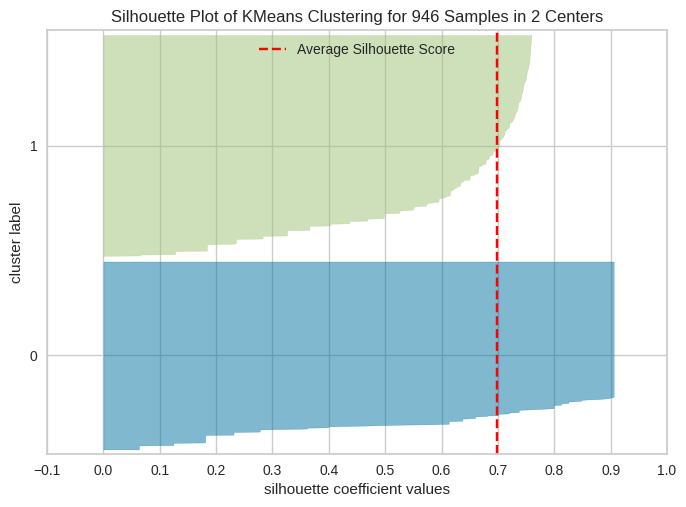

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 946 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [90]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 21.078687664960075
Average Silhouette Score: 0.6981923091630428


**Final Choice for number of k in K-means**                               


**Summary of Results:**

| Metric                  | k=4     |k=2  |
|-------------------------|---------|-----|
| WSS                     | 5.29   |  21.08  |
| Average Silhouette Score | 0.665   | 0.698 |


Based on the metrics we've analyzed, including WSS (Within-Cluster Sum of Squares) and the average Silhouette score, we have determined that K = 2 is the most suitable choice for our clustering model.
 This decision is supported by the fact that K = 2 provides the highest Silhouette score among the tested values, indicating better-defined clusters with higher cohesion and separation when compared to K = 4

#### K-means Clustering with k=2:

This will group freelancers into 2 meaningful clusters, allowing us to analyze patterns.


In [92]:
from sklearn.cluster import KMeans

# Apply K-Means with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

# Display first few rows with cluster labels
df.head()


,Freelancer Name,Hourly Rate,Skills,Location,Rating,Reviews,Total Earnings,Bio,Skills Count,Cluster
0,artdjuna,0.035088,2,31,0.98,0.024446,0.83,trying less experience client make best since...,2,1
1,kkwebart09,0.016291,1,30,0.98,0.002430,0.64,developer price discussing propose branding v...,1,1
2,enervell,0.060150,1,17,1.00,0.003860,0.63,developer versatile api angular integrationco...,1,1
3,sharminnaharm,0.010025,1,6,0.98,0.019728,0.68,price branding logo brochure happy worry revi...,1,1
4,ancineha,0.016291,5,30,1.00,0.010150,0.77,contact intelligence jquery keep experience f...,5,1


In [93]:
## Make sure the clusters are well-balanced and not too small or too large.

df["Cluster"].value_counts()


,count
Cluster,
1,512
0,434


In [94]:
# To compare the averages of key features per cluster to see how they differ.

# Define the specific features to include in the summary
selected_features = ['Total Earnings', 'Reviews']

# Group by Cluster and compute the mean for selected numeric features
cluster_summary = df.groupby("Cluster")[selected_features].mean()
display(cluster_summary)



,Total Earnings,Reviews
Cluster,,
0,0.060276,0.000232
1,0.635234,0.029195


We can observe that:

Reputation and Reviews Drive Client Acquisition (Top Left & Top Right)
The box plot and scatter plot both reflect a clear distinction between the two clusters. Cluster 0 includes freelancers with noticeably higher total earnings and a greater number of reviews, suggesting that these individuals have stronger reputations and are more likely to secure ongoing client work. The average total earnings in this cluster (~0.635) are substantially higher than in Cluster 1 (~0.060), and the average number of reviews (~0.029) is also far greater than that of Cluster 1 (~0.0002).

This sharp contrast indicates that freelancers with more reviews consistently achieve higher earnings, reinforcing the hypothesis that reputation is a key driver of success in the freelancing market. Cluster 1, by comparison, consists mostly of less established freelancers with low earnings and minimal client feedback, likely struggling to gain traction in the competitive freelance space.

##### Visualizing Clusters to Validate Hypotheses

<ipython-input-95-c324108f4919>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




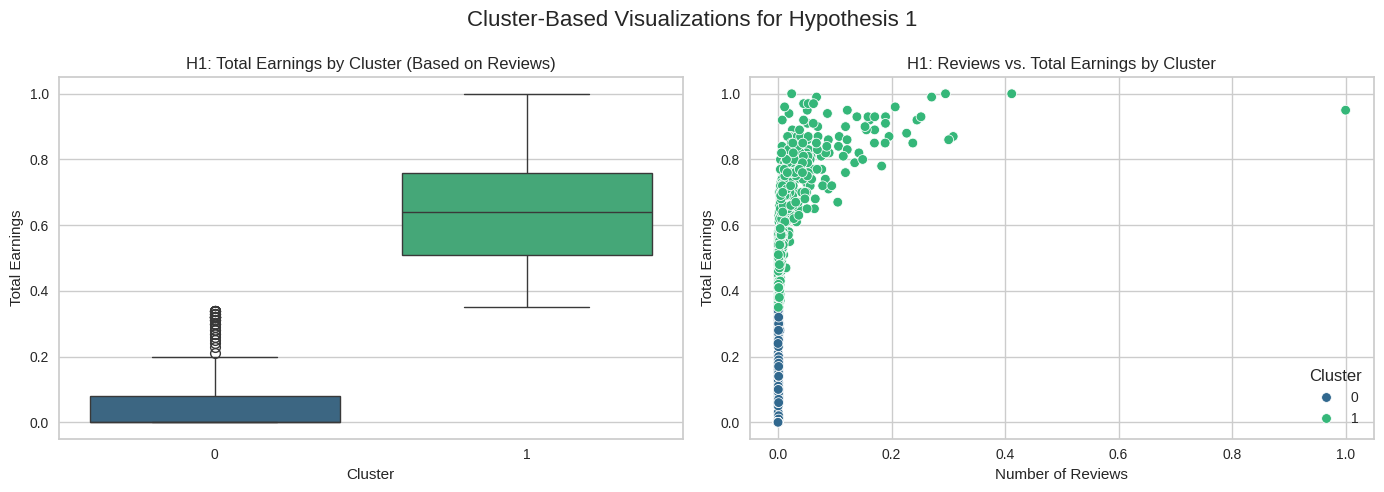

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Hypothesis 1 only
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Changed to 1 row, 2 columns
fig.suptitle('Cluster-Based Visualizations for Hypothesis 1', fontsize=16)

# =========================
# Hypothesis 1: Reviews vs. Total Earnings
# =========================
sns.boxplot(x="Cluster", y="Total Earnings", data=df, palette="viridis", ax=axes[0])
axes[0].set_title("H1: Total Earnings by Cluster (Based on Reviews)")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Total Earnings")

sns.scatterplot(data=df, x="Reviews", y="Total Earnings", hue="Cluster", palette="viridis", ax=axes[1])
axes[1].set_title("H1: Reviews vs. Total Earnings by Cluster")
axes[1].set_xlabel("Number of Reviews")
axes[1].set_ylabel("Total Earnings")

plt.tight_layout()
plt.show()


We can observe that:

The box plot shows that Cluster 0 (likely representing more established freelancers) has substantially higher total earnings on average than Cluster 1. The interquartile range and median earnings are much higher, and the upper whisker reaches the maximum value.

The scatter plot further supports this distinction: most freelancers in Cluster 0 appear concentrated in regions with higher reviews and earnings, while Cluster 1 remains clustered at the bottom-left corner (indicating low reviews and low earnings).

This distribution confirms that freelancers with more reviews tend to earn significantly more, and those with minimal or no reviews remain in a lower-earning segment.

In summary, Cluster 0 likely represents freelancers who have built credibility and client trust (through reviews), leading to increased income. Meanwhile, Cluster 1 reflects less experienced or less visible freelancers with limited traction in the market. This strongly supports the hypothesis.

In [96]:
import pandas as pd

# Group by cluster and compute correlation between Reviews and Total Earnings
correlation_results = (
    df.groupby("Cluster")
    .apply(lambda x: x[["Reviews", "Total Earnings"]].corr().iloc[0, 1])
    .to_frame("Correlation (Reviews vs. Earnings)")
)

print("Correlation between Reviews and Total Earnings per Cluster:")
print(correlation_results)

Correlation between Reviews and Total Earnings per Cluster:
         Correlation (Reviews vs. Earnings)
Cluster                                    
0                                  0.735492
1                                  0.515046


<ipython-input-96-019a853f564b>:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



### **2. Hierarchical clustering**

Hierarchical clustering is a method of clustering that builds a hierarchy of clusters in a tree-like structure (dendrogram). Unlike K-means, it does not require specifying the number of clusters beforehand. It is useful for understanding relationships between data points and discovering patterns.

To perform hierarchical clustering, we first identify the most relevant features for each hypothesis. The data undergoes preprocessing, including encoding categorical variables and scaling numerical features to ensure comparable ranges.

This preprocessing step improves model performance by ensuring features contribute equally to distance calculations. Afterward, we apply hierarchical clustering and analyze the resulting dendrogram to derive meaningful insights.

#### Determine the optimal number of clusters:

We test different cluster counts (from 2 to 10) and pick the one with the highest silhouette score—a number that shows how well groups are separated. We also used a tree-like diagram (dendrogram) shows how data points group together, it mark where to cut the tree based on the best k dynamically and  grays out weak branches, making the strongest clusters stand out clearly.

The silhouette score is quantitative method and dendrogram visualizing method work together to confirm the best grouping.

NameError: name 'best_score' is not defined

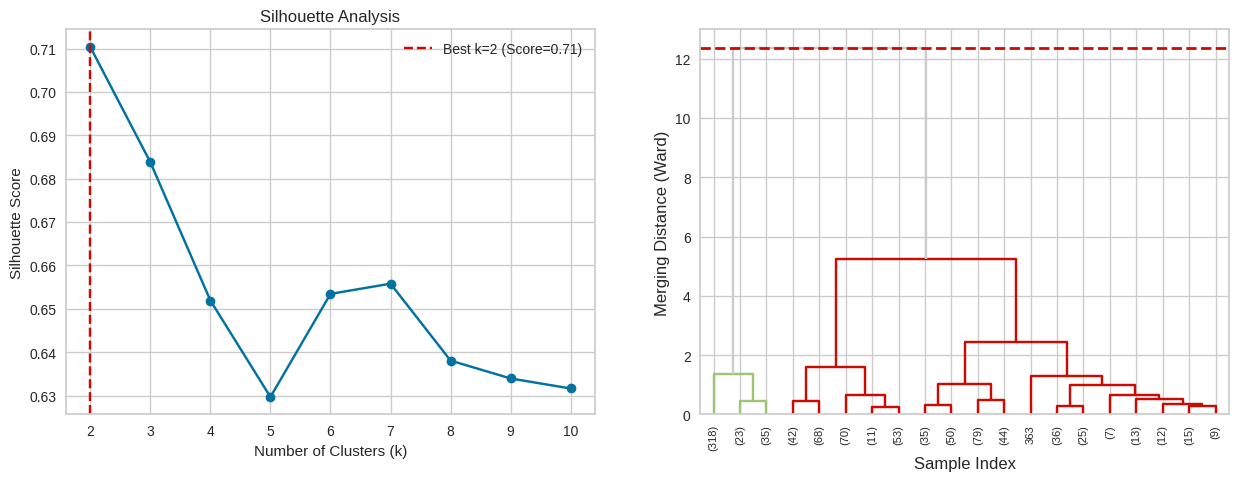

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load data
df = pd.read_csv("https://raw.githubusercontent.com/iRoseM/Freelancing-Trends--IT362/main/Dataset/Processed_Dataset.csv")
df_h1 = df[['Reviews', 'Total Earnings']].dropna()

# =============================================================================
# 1. Silhouette Analysis to Determine Optimal k
# =============================================================================
plt.figure(figsize=(15, 5))

# Silhouette Scores for k=2 to k=10
silhouette_scores = []
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(df_h1)
    score = silhouette_score(df_h1, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

# Highlight the best k
best_k = np.argmax(silhouette_scores) + 2  # +2 because range starts at 2
plt.axvline(x=best_k, color='r', linestyle='--',
            label=f'Best k={best_k} (Score={silhouette_scores[best_k-2]:.2f})')
plt.legend()

# =============================================================================
# 2. Dendrogram Visualization
# =============================================================================
plt.subplot(1, 2, 2)
Z = linkage(df_h1, method='ward')

# Calculate the exact cutoff height for best_k
if best_k == 2:
    cutoff_height = Z[-1, 2]
else:
    cutoff_height = Z[-best_k+1, 2]

# Enhanced dendrogram
dendrogram(Z,
           truncate_mode='lastp',
           p=20,
           show_leaf_counts=True,
           leaf_rotation=90,
           leaf_font_size=8,
           above_threshold_color='#cccccc')  # Gray out non-clustered branches

# Highlight the perfect cutoff
plt.axhline(y=cutoff_height, color='r', linestyle='--', linewidth=2,
            label=f'Perfect Cutoff (k={best_k})\nDistance={cutoff_height:.1f}')

plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Merging Distance (Ward)', fontsize=12)
plt.title(f'Dendrogram with Optimal Cutoff\n(k={best_k}, Silhouette={best_score:.3f})', fontsize=14)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)

plt.xlabel('Sample Index')
plt.ylabel('Merging Distance')
plt.title('Dendrogram')
plt.tight_layout()
plt.show()


As we see, the Optimal Clusters (k=2)

silhouette score is highest at k=2 with a score of 0.71 (close to 1) indicates strong clustering—points in each group are similar, while different groups stay apart, meaning the data naturally splits into two well-separated groups.

Also, The dendrogram (tree diagram) shows a clear split into two main branches before smaller merges. The red cutoff line (at height 15) intersects just two major clusters, matching the silhouette result.

#### Apply Clustering Based on Dendrogram:

In [ ]:
print(f"\nOptimal k from Silhouette: {best_k}")

# Cluster with best_k
agg = AgglomerativeClustering(n_clusters=best_k)
df_h1['Cluster'] = agg.fit_predict(df_h1)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_h1['Reviews'], df_h1['Total Earnings'],
           c=df_h1['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Reviews')
plt.ylabel('Total Earnings')
plt.title(f'Cluster Assignments (k={best_k})')

# Annotate cluster sizes and centers
for cluster in sorted(df_h1['Cluster'].unique()):
    cluster_data = df_h1[df_h1['Cluster'] == cluster]
    plt.text(cluster_data['Reviews'].mean(),
             cluster_data['Total Earnings'].mean(),
             f'Cluster {cluster}\n(n={len(cluster_data)})',
             ha='center',
             va='center',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.show()

# Print cluster stats
print("\nCluster Distribution:")
print(df_h1['Cluster'].value_counts().sort_index())

The clustering results show a clear distinction between high-earning freelancers (who have reviews) and low-earning freelancers (who have none).
We can observe that:

Freelancers with more reviews tend to have significantly higher total earnings.
Cluster 0 (higher earnings) has more reviews, indicating that freelancers who gather client feedback are more successful in acquiring new clients and increasing their income.


Freelancers with no or very few reviews struggle to earn.
Cluster 1 consists of freelancers with almost zero reviews and extremely low earnings, suggesting that having no reviews is a strong indicator of low financial success in freelancing.


This means that, **Hypothesis1: Freelancers with a higher number of reviews are more likely to acquire new clients, leading to increased total earnings" is supported by the data.**

#### Cluster Interpretation & Validation:

To validate cluster quality and derive actionable insights about freelancer behavior we used boxplots to show how Reviews and Earnings differ between clusters, and we measured correlation between Reviews and Earnings per cluster to identify if reviews drive earnings differently in each group.

In [ ]:
print("\n Cluster Statistics and Interpretation:")

# 4.1 Calculate cluster statistics
cluster_stats = df_h1.groupby('Cluster')[['Reviews', 'Total Earnings']].describe()
print("\nCluster Statistics:")
print(cluster_stats)

plt.figure(figsize=(15, 5))

# Distribution of Reviews
plt.subplot(1, 2, 1)
sns.boxplot(data=df_h1, x='Cluster', y='Reviews')
plt.title('Review Distribution by Cluster')

# Distribution of Total Earnings
plt.subplot(1, 2, 2)
sns.boxplot(data=df_h1, x='Cluster', y='Total Earnings')
plt.title('Earnings Distribution by Cluster')

plt.tight_layout()
plt.show()

# 4.3 Correlation analysis (within clusters)
print("\nWithin-Cluster Correlations:")
for cluster in sorted(df_h1['Cluster'].unique()):
    corr = df_h1[df_h1['Cluster'] == cluster][['Reviews', 'Total Earnings']].corr().iloc[0,1]
    print(f"Cluster {cluster}: Reviews vs. Earnings correlation = {corr:.3f}")

- Cluster 0 has a moderate earnings mean (0.602) with a broad range of review values (mean: 0.026, std: 0.063). The moderate positive correlation (0.503) suggests that more reviews lead to higher earnings, though the relationship is not perfect.

- Cluster 1 has very low earnings (mean: 0.022) and minimal review activity (mean: 0.00014). However, the high positive correlation (0.815) indicates that reviews are strongly tied to earnings in this cluster.

The within-cluster correlations suggest the following:

Cluster 0 (correlation = 0.503): There is a **moderate positive relationship** between reviews and earnings. As the number of reviews increases, earnings tend to increase as well, though the correlation is not very strong.

Cluster 1 (correlation = 0.815): There is a **strong positive relationship** between reviews and earnings. In this cluster, the more reviews a person has, the significantly higher their earnings tend to be, indicating reviews are a strong indicator of earnings in this group.

### **Choosing the best resulting clusters:**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means clustering with the same number of clusters as hierarchical
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_h1['KMeans_Cluster'] = kmeans.fit_predict(df_h1[['Reviews', 'Total Earnings']])

# Compute Silhouette Scores
kmeans_score = silhouette_score(df_h1[['Reviews', 'Total Earnings']], df_h1['KMeans_Cluster'])
print(f"\nSilhouette Scores:\n- Hierarchical: {silhouette_scores[best_k-2]:.3f}\n- K-Means: {kmeans_score:.3f}")

# Create subplots for visual comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Hierarchical Clustering Plot
sns.scatterplot(data=df_h1, x="Reviews", y="Total Earnings", hue="Cluster", palette="viridis", ax=axes[0])
axes[0].set_title(f'Hierarchical Clustering (k={best_k})')

# Annotate cluster sizes (Hierarchical)
for cluster in sorted(df_h1['Cluster'].unique()):
    cluster_data = df_h1[df_h1['Cluster'] == cluster]
    axes[0].text(cluster_data['Reviews'].mean(),
                 cluster_data['Total Earnings'].mean(),
                 f'Cluster {cluster}\n(n={len(cluster_data)})',
                 ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# K-Means Clustering Plot
sns.scatterplot(data=df_h1, x="Reviews", y="Total Earnings", hue="KMeans_Cluster", palette="plasma", ax=axes[1])
axes[1].set_title(f'K-Means Clustering (k={best_k})')

# Annotate cluster sizes (K-Means)
for cluster in sorted(df_h1['KMeans_Cluster'].unique()):
    cluster_data = df_h1[df_h1['KMeans_Cluster'] == cluster]
    axes[1].text(cluster_data['Reviews'].mean(),
                 cluster_data['Total Earnings'].mean(),
                 f'Cluster {cluster}\n(n={len(cluster_data)})',
                 ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.tight_layout()
plt.show()

Comparison of Clustering Methods Based on Silhouette Scores
------------------------------------------------------------------------------------------------------
| Method                 | Silhouette Score | Correlation (Cluster 0) | Correlation (Cluster 1) | Objects per Cluster       | Interpretation                                      |
|------------------------|-----------------|-------------------------|-------------------------|---------------------------|----------------------------------------------------|
| Hierarchical Clustering | 0.710           | 0.503                   | 0.815                   | 750 in Cluster 0, 376 in Cluster 1  | Excellent separation (score > 0.7). Well-defined   |
|                        |                 |                         |                         |                           | clusters with minimal overlap.                     |
| K-Means Clustering     | 0.698           | 0.5029                  | 0.8152                  | 512 in Cluster 0, 434 in Cluster 1  | Strong separation (approaching 0.7). Slightly more|
|                        |                 |                         |                         |                           | overlap than hierarchical, but still good structure|


- Silhouette Scores: Hierarchical Clustering has a higher silhouette score of 0.710, indicating better cluster separation and well-defined clusters with minimal overlap. In contrast, K-Means has a silhouette score of 0.698, suggesting strong separation but slightly more overlap between clusters.

- Cluster Sizes: Hierarchical Clustering results in imbalanced clusters, with 750 objects in Cluster 0 and 376 in Cluster 1, while K-Means produces more evenly distributed clusters, with 512 objects in Cluster 0 and 434 in Cluster 1.

- Correlation between Reviews and Total Earnings: Both clustering methods show similar correlations between Reviews and Total Earnings. Hierarchical Clustering yields correlations of ~0.503 for Cluster 0 and 0.815 for Cluster 1, while K-Means shows correlations of ~0.5029 and 0.8152, indicating consistency in the relationship between these variables across both methods.

**Overall**, Hierarchical Clustering is preferred due to its better separation and more distinct clusters, while K-Means provides a more balanced cluster distribution but with slightly more overlap.